# Youtube Tutorial
- https://www.youtube.com/watch?v=rr-KwIjinpM&list=PLgNJO2hghbmjNrHZqplNMEpsW-QLFdvJV

this project will go through the entire 'CRISP DM Model':
- Cross Industry Standard Process for Data Mining
    - Business Understanding
    - Data Understanding
    - Data Preparation
    - Modelling
    - Evaluation
    - Presenting/Visualizing the data / Deployment
    
 Barry
 Drove
 Directly to the
 Medical
 Emergency
 Department

# 1. Business Understanding
- Forcasting transactions
- Likely regression
- Data for 3 years
- Advised data quality is okay

# 2. Data Understanding

In [2]:
import pandas as pd

## Creating the data

In [3]:
df = pd.read_csv('regression.csv')

## Reading the data

In [4]:
df.head()
#on first glance it looks like we will have to predict the amount column (target column)
#it also looks like the feature columns will be everything else

Year Month Cost Centre  Account Account Description Account Type    Amount
0  2019   Jan       CC100  1000000       Product Sales      Revenue  1344.051
1  2019   Jan       CC100  1000001   Licensing Revenue      Revenue   480.968
2  2019   Jan       CC100  1000002     Service Revenue      Revenue   650.820
3  2019   Jan       CC100  1000004         Fee Revenue      Revenue   339.360
4  2019   Jan       CC100  2000000   Cost of Good Sold      Expense  1125.328

In [5]:
df.tail()
#tells us we got about 3 years worth of data
#ends in Dec.
#clean data not many null columns on first glance

Year Month Cost Centre  Account  Account Description Account Type  \
4207  2021   Dec       CC302  2000005            Purchases      Expense   
4208  2021   Dec       CC302  3000000         Cash at Bank        Asset   
4209  2021   Dec       CC302  3000001            Inventory        Asset   
4210  2021   Dec       CC302  3000002  Accounts Receivable        Asset   
4211  2021   Dec       CC302  4000001     Accounts Payable    Liability   

        Amount  
4207   698.121  
4208  -282.056  
4209   537.478  
4210  1152.680  
4211 -1020.000

In [6]:
df.info()
#check to see for null columns
#looking at 'non-null' for each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4212 entries, 0 to 4211
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year                 4212 non-null   int64  
 1   Month                4212 non-null   object 
 2   Cost Centre          4212 non-null   object 
 3   Account              4212 non-null   int64  
 4   Account Description  4212 non-null   object 
 5   Account Type         4212 non-null   object 
 6   Amount               4212 non-null   float64
dtypes: float64(1), int64(2), object(4)
memory usage: 230.5+ KB


In [7]:
for col in df.columns:
    print(col, len(df[col].unique()), df[col].unique())
#this prints a couple things
##name of the column
##how many unuque values there are
##an example of the unique values
###month column could be converted to a number
#note the account description matches the number of accounts (may want to drop one of these in data prep step)
#check uniqueness for the values in the columns
#this helps define how many diffrent types of catagories within the data
#this is using a loop through df columns.

Year 3 [2019 2020 2021]
Month 12 ['Jan' 'Feb' 'Mar' 'Apr' 'May' 'Jun' 'Jul' 'Aug' 'Sep' 'Oct' 'Nov' 'Dec']
Cost Centre 9 ['CC100' 'CC101' 'CC102' 'CC200' 'CC201' 'CC202' 'CC300' 'CC301' 'CC302']
Account 13 [1000000 1000001 1000002 1000004 2000000 2000001 2000002 2000003 2000005
 3000000 3000001 3000002 4000001]
Account Description 13 ['Product Sales' 'Licensing Revenue' 'Service Revenue' 'Fee Revenue'
 'Cost of Good Sold' 'Staff Expenses' 'Technology Expenses'
 'Property Expenses' 'Purchases' 'Cash at Bank' 'Inventory'
 'Accounts Receivable' 'Accounts Payable']
Account Type 4 ['Revenue' 'Expense' 'Asset' 'Liability']
Amount 3956 [1344.051  480.968  650.82  ... -282.056  537.478 1152.68 ]


In [8]:
df.dtypes
#helps know data types

Year                     int64
Month                   object
Cost Centre             object
Account                  int64
Account Description     object
Account Type            object
Amount                 float64
dtype: object

In [9]:
df.describe()
#helps know min and max values

Year       Account       Amount
count  4212.000000  4.212000e+03  4212.000000
mean   2020.000000  2.076925e+06   476.470421
std       0.816594  9.167528e+05   477.296234
min    2019.000000  1.000000e+06 -1020.000000
25%    2019.000000  1.000004e+06   268.044500
50%    2020.000000  2.000002e+06   512.998500
75%    2021.000000  3.000000e+06   755.960250
max    2021.000000  4.000001e+06  2378.880000

## Ploting/Charting the data

In [10]:
from matplotlib import pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='Account Type', ylabel='Amount'>

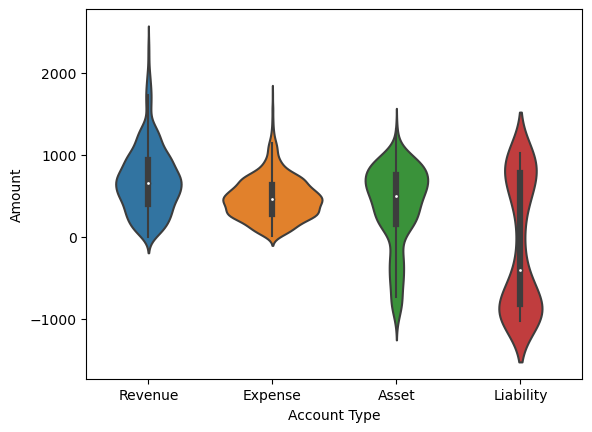

In [11]:
#look at the spread of the transactions
#what are the values and disctrobutions
sns.violinplot(x='Account Type', y='Amount', data=df)

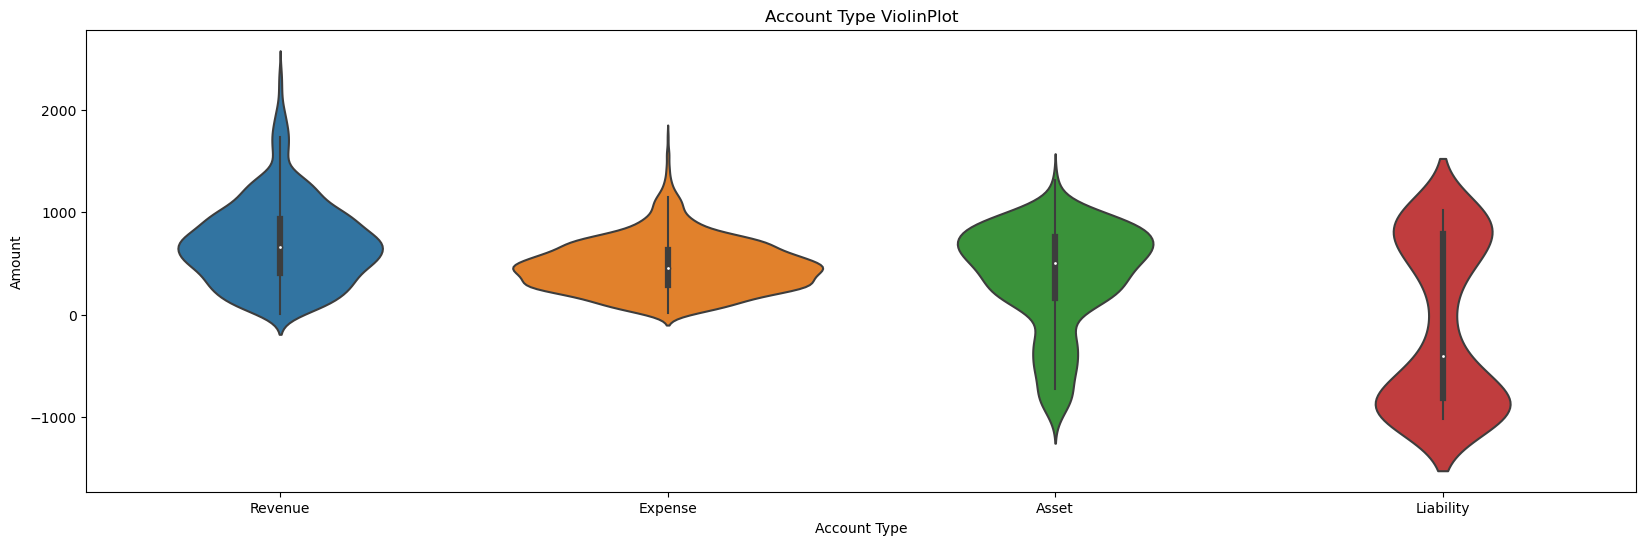

In [12]:
#because this looks a bit small we can adjust the size by doing the following
plt.figure(figsize=(20,6))
sns.violinplot(x='Account Type', y='Amount', data=df).set_title('Account Type ViolinPlot')
plt.show()

>* Revenue accounts tend to average out aroud 800-900  
>* Expense accounts tend to average out around 750  
>* Asset accounts tend to average out around 850  
>* Liability accounts have a big spread typically in either -900 or 900  

### Investigating Liability account due to the abonormality

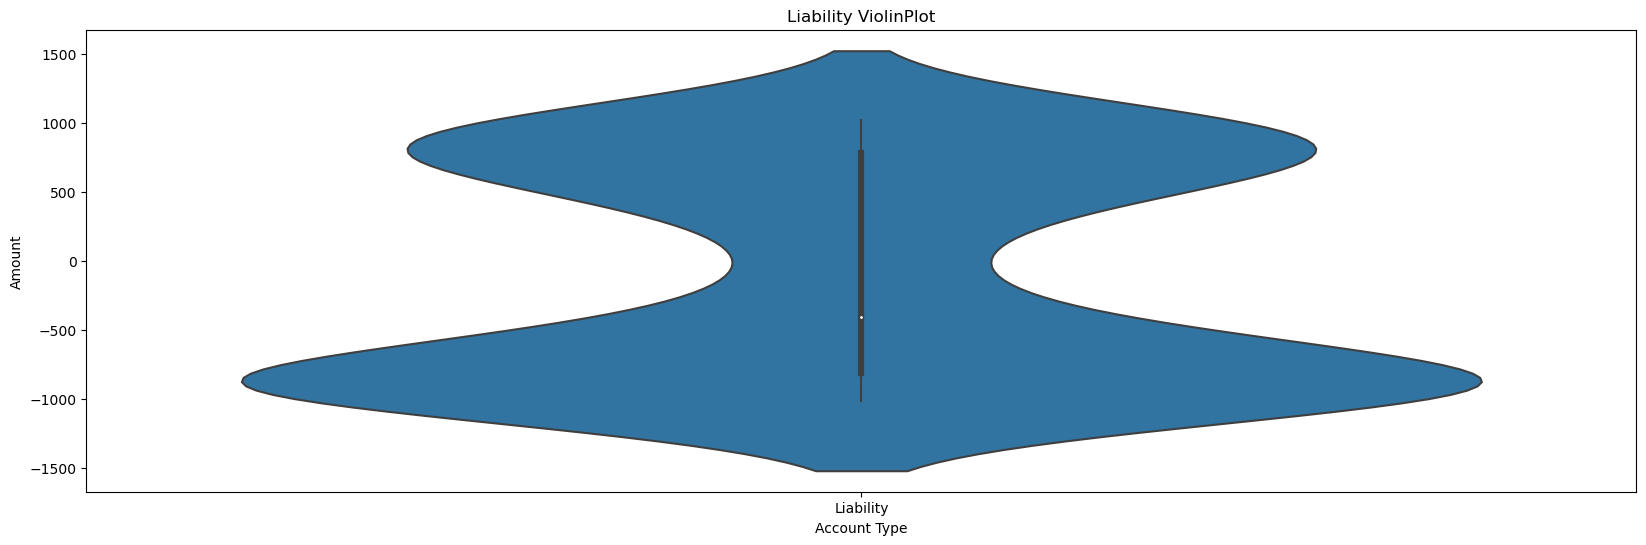

In [13]:
plt.figure(figsize=(20,6))
sns.violinplot(x='Account Type', y='Amount', data=df[df['Account Type']=='Liability']).set_title('Liability ViolinPlot')
plt.show()

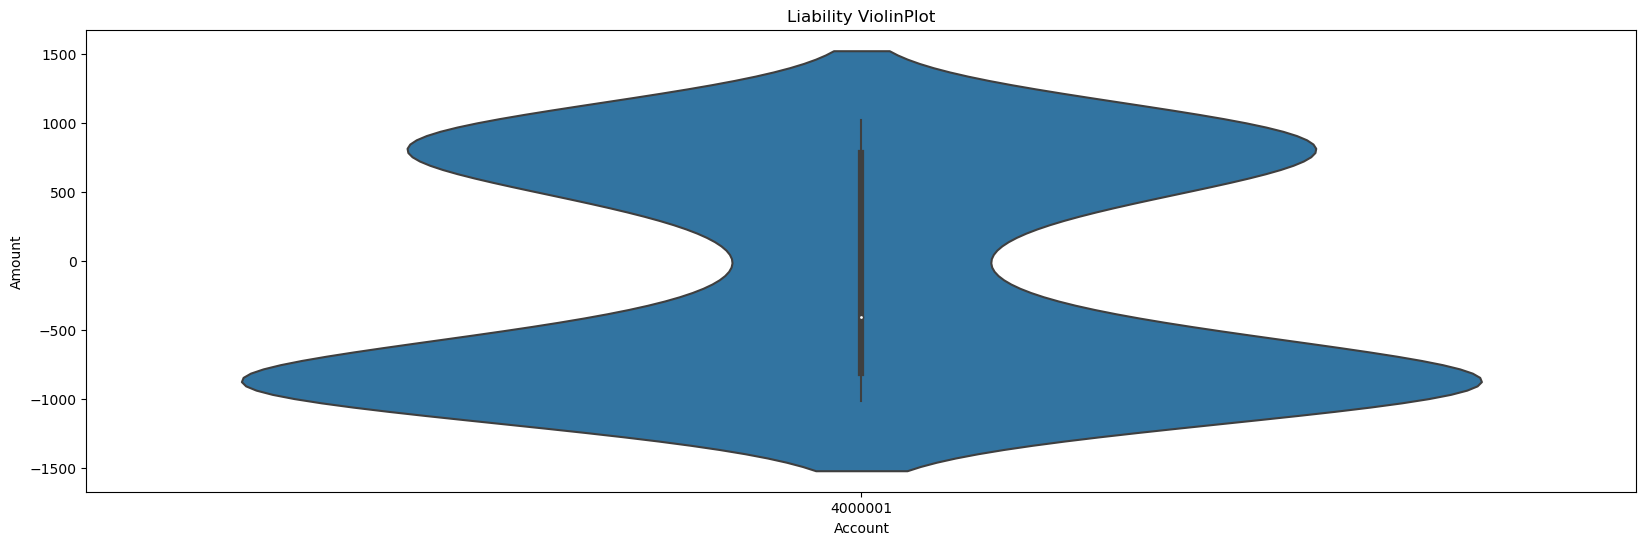

In [14]:
#now let's look at the sub accounts // the account that make up the liability account
#we can do this by changing the x variable
plt.figure(figsize=(20,6))
sns.violinplot(x='Account', y='Amount', data=df[df['Account Type']=='Liability']).set_title('Liability ViolinPlot')
plt.show()

>It appears there is only one account, if there were many account's (bigger spread) we may want to do some data transformations. But because we are just doing vizulitzation we will leave it... 

### Investigating Revenue

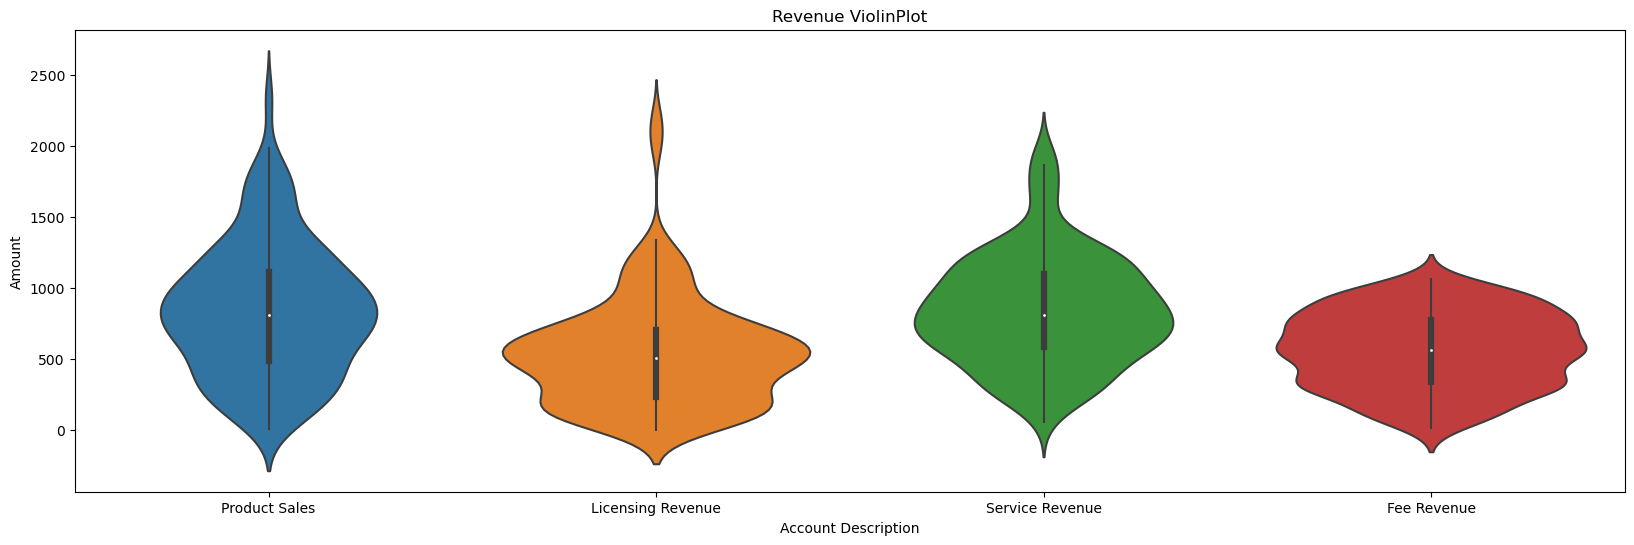

In [15]:
#we can do this for revenue as well...
#now let's look at the sub accounts // the accounts that make up the revenue account
#we can do this by changing the x variable
plt.figure(figsize=(20,6))
sns.violinplot(x='Account Description', y='Amount', data=df[df['Account Type']=='Revenue']).set_title('Revenue ViolinPlot')
plt.show()

> This cal tell us alot about what our revenue looks like from each source... product sales seems to be generating the most with fee revenue having the closest deviation.

### Looking at trends across the years

#### Create a date column

In [16]:
df.head()

Year Month Cost Centre  Account Account Description Account Type    Amount
0  2019   Jan       CC100  1000000       Product Sales      Revenue  1344.051
1  2019   Jan       CC100  1000001   Licensing Revenue      Revenue   480.968
2  2019   Jan       CC100  1000002     Service Revenue      Revenue   650.820
3  2019   Jan       CC100  1000004         Fee Revenue      Revenue   339.360
4  2019   Jan       CC100  2000000   Cost of Good Sold      Expense  1125.328

In [17]:
#convert out year and month into one col. named 'date'
#allowing for visulization over a period of time or specific date
#convert these first two col (year, month) into a steak string

monthmap = {
    'Jan':1,
    'Feb':2,
    'Mar':3,
    'Apr':4,
    'May':5,
    'Jun':6,
    'Jul':7,
    'Aug':8,
    'Sep':9,
    'Oct':10,
    'Nov':11,
    'Dec':12,
}

In [18]:
df['Period'] = df['Month'].apply(lambda x: monthmap[x])
df.head()
#we now made a new col. named period and corresponded it too month

Year Month Cost Centre  Account Account Description Account Type    Amount  \
0  2019   Jan       CC100  1000000       Product Sales      Revenue  1344.051   
1  2019   Jan       CC100  1000001   Licensing Revenue      Revenue   480.968   
2  2019   Jan       CC100  1000002     Service Revenue      Revenue   650.820   
3  2019   Jan       CC100  1000004         Fee Revenue      Revenue   339.360   
4  2019   Jan       CC100  2000000   Cost of Good Sold      Expense  1125.328   

   Period  
0       1  
1       1  
2       1  
3       1  
4       1

In [19]:
df.tail()
#see how period for dec. is period 12

Year Month Cost Centre  Account  Account Description Account Type  \
4207  2021   Dec       CC302  2000005            Purchases      Expense   
4208  2021   Dec       CC302  3000000         Cash at Bank        Asset   
4209  2021   Dec       CC302  3000001            Inventory        Asset   
4210  2021   Dec       CC302  3000002  Accounts Receivable        Asset   
4211  2021   Dec       CC302  4000001     Accounts Payable    Liability   

        Amount  Period  
4207   698.121      12  
4208  -282.056      12  
4209   537.478      12  
4210  1152.680      12  
4211 -1020.000      12

In [20]:
df['Day'] = 1
df.head()
#we now have a day col. with all the values in it being 1

Year Month Cost Centre  Account Account Description Account Type    Amount  \
0  2019   Jan       CC100  1000000       Product Sales      Revenue  1344.051   
1  2019   Jan       CC100  1000001   Licensing Revenue      Revenue   480.968   
2  2019   Jan       CC100  1000002     Service Revenue      Revenue   650.820   
3  2019   Jan       CC100  1000004         Fee Revenue      Revenue   339.360   
4  2019   Jan       CC100  2000000   Cost of Good Sold      Expense  1125.328   

   Period  Day  
0       1    1  
1       1    1  
2       1    1  
3       1    1  
4       1    1

In [21]:
# we can now string all the col's togeather to make a date/time col.
df['Date'] = df['Year'].astype(str) + '-' + df['Period'].astype(str) + '-' + df['Day'].astype(str)

In [22]:
df.head()

Year Month Cost Centre  Account Account Description Account Type    Amount  \
0  2019   Jan       CC100  1000000       Product Sales      Revenue  1344.051   
1  2019   Jan       CC100  1000001   Licensing Revenue      Revenue   480.968   
2  2019   Jan       CC100  1000002     Service Revenue      Revenue   650.820   
3  2019   Jan       CC100  1000004         Fee Revenue      Revenue   339.360   
4  2019   Jan       CC100  2000000   Cost of Good Sold      Expense  1125.328   

   Period  Day      Date  
0       1    1  2019-1-1  
1       1    1  2019-1-1  
2       1    1  2019-1-1  
3       1    1  2019-1-1  
4       1    1  2019-1-1

In [23]:
#check to see if the new date col. has the correct 'date' data type
#you can see here that the Date col. is an object now a 'date' type...
df.dtypes

Year                     int64
Month                   object
Cost Centre             object
Account                  int64
Account Description     object
Account Type            object
Amount                 float64
Period                   int64
Day                      int64
Date                    object
dtype: object

In [24]:
#to fix this, we must do the following...
df['Date'] = pd.to_datetime(df['Date'])

In [25]:
df.dtypes

Year                            int64
Month                          object
Cost Centre                    object
Account                         int64
Account Description            object
Account Type                   object
Amount                        float64
Period                          int64
Day                             int64
Date                   datetime64[ns]
dtype: object

### Visualize Trends by Date

<AxesSubplot:xlabel='Date', ylabel='Amount'>

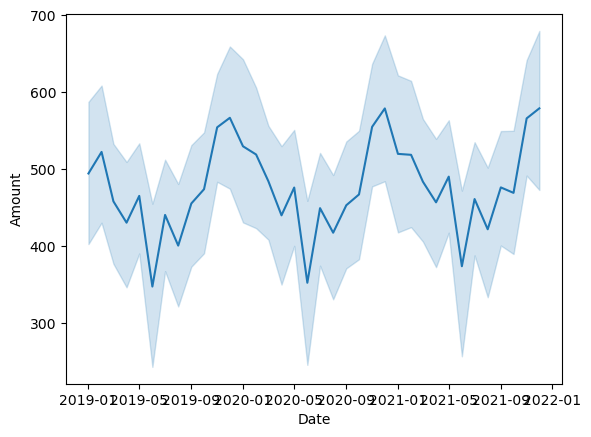

In [26]:
#recommeneded to visualize revenue first using seaborn
sns.lineplot(x='Date', y='Amount', data=df)

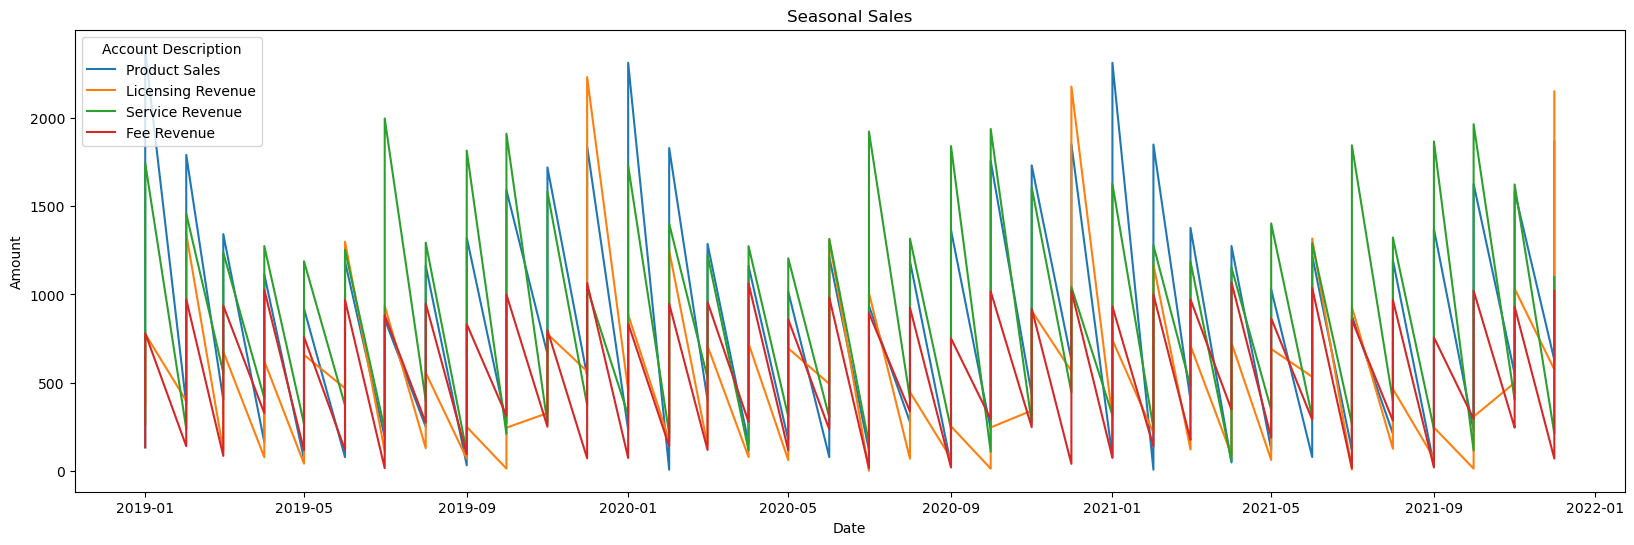

In [27]:
#to filter this...
plt.figure(figsize=(20,6))
sns.lineplot(x='Date', y='Amount', hue='Account Description', estimator=None, data=df[df['Account Type']=='Revenue']).set_title('Seasonal Sales')
plt.show()

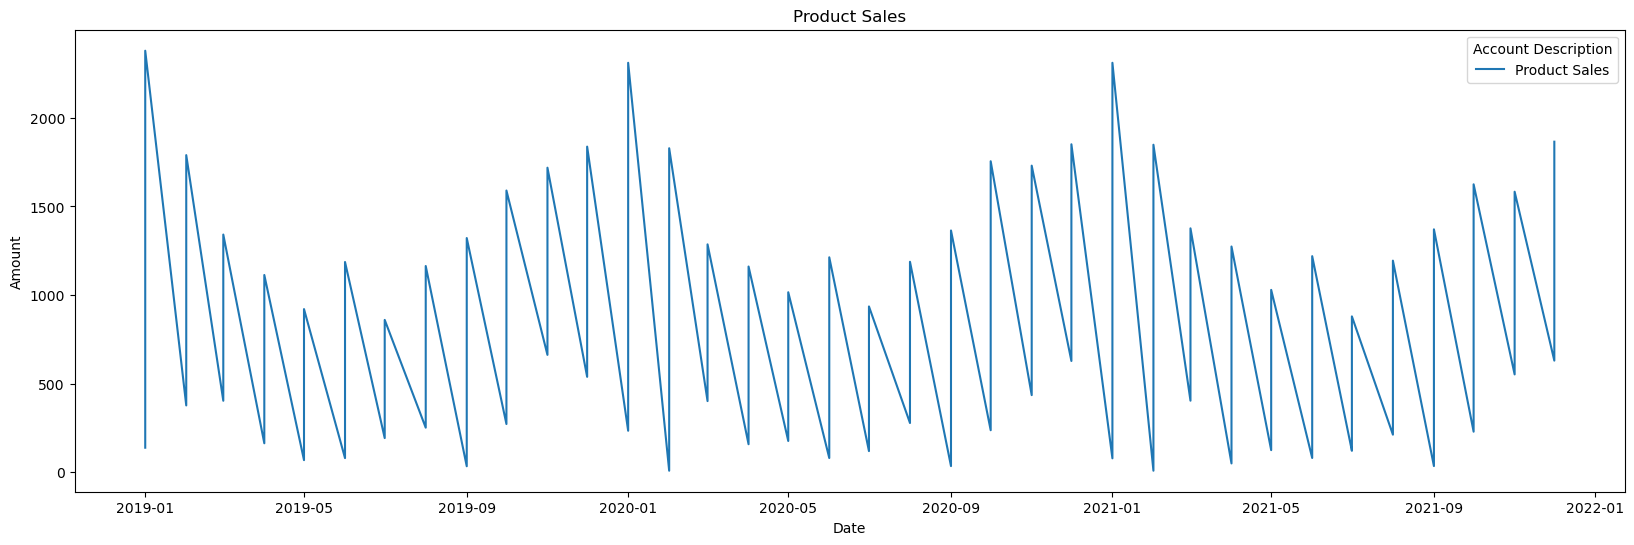

In [28]:
#to filter this more filters for one account...
plt.figure(figsize=(20,6))
sns.lineplot(x='Date', y='Amount', hue='Account Description', estimator=None, data=df[df['Account Description']=='Product Sales']).set_title('Product Sales')
plt.show()

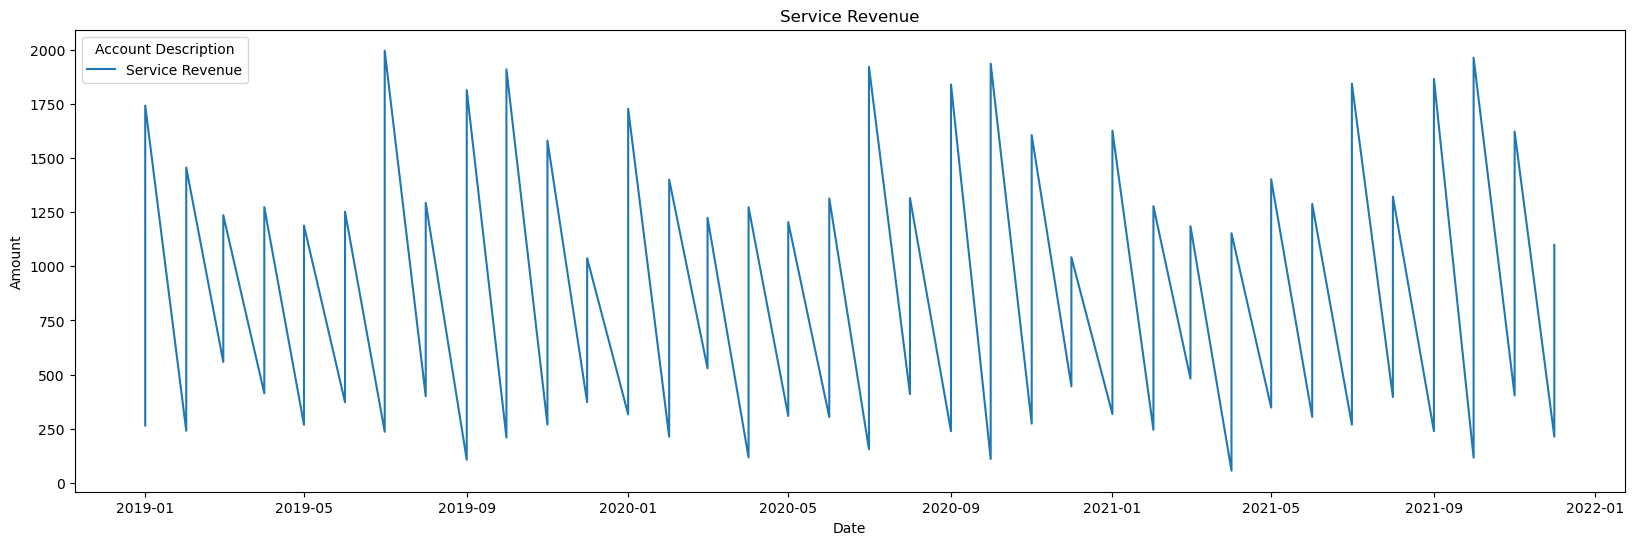

In [29]:
#to filter this more filters for one account...
plt.figure(figsize=(20,6))
sns.lineplot(x='Date', y='Amount', hue='Account Description', estimator=None, data=df[df['Account Description']=='Service Revenue']).set_title('Service Revenue')
plt.show()

In summary, when looking at all accounts, it's messy... when looking at just product sales and service revenue, we can see product sales is perhaps seasonal, while service revenue not so much...

## Correlation of the data

In [30]:
#because our accounts are all in one col. we can't see the correlation between accounts...
df.corr()

Year       Account    Amount        Period  Day
Year     1.000000e+00 -5.466737e-15  0.014750 -5.695624e-13  NaN
Account -5.466737e-15  1.000000e+00 -0.417946  2.315721e-16  NaN
Amount   1.475040e-02 -4.179456e-01  1.000000  2.447256e-02  NaN
Period  -5.695624e-13  2.315721e-16  0.024473  1.000000e+00  NaN
Day               NaN           NaN       NaN           NaN  NaN

In [31]:
#but if we want to see correlation between accounts...
#service revenue vs. staff costs (staff expenses)
df['Account Description'].unique()

array(['Product Sales', 'Licensing Revenue', 'Service Revenue',
       'Fee Revenue', 'Cost of Good Sold', 'Staff Expenses',
       'Technology Expenses', 'Property Expenses', 'Purchases',
       'Cash at Bank', 'Inventory', 'Accounts Receivable',
       'Accounts Payable'], dtype=object)

In [32]:
#we need to reshape our df to have individual col. representing each account description (see above the unique)
#this can be achieved by looping through this list above
pd.get_dummies(df['Account'])

1000000  1000001  1000002  1000004  2000000  2000001  2000002  2000003  \
0           1        0        0        0        0        0        0        0   
1           0        1        0        0        0        0        0        0   
2           0        0        1        0        0        0        0        0   
3           0        0        0        1        0        0        0        0   
4           0        0        0        0        1        0        0        0   
...       ...      ...      ...      ...      ...      ...      ...      ...   
4207        0        0        0        0        0        0        0        0   
4208        0        0        0        0        0        0        0        0   
4209        0        0        0        0        0        0        0        0   
4210        0        0        0        0        0        0        0        0   
4211        0        0        0        0        0        0        0        0   

      2000005  3000000  3000001  3000002  4000001  
0           0        0        0        0        0  
1           0        0        0        0        0  
2           0        0        0        0        0  
3           0        0        0        0        0  
4           0        0        0        0        0  
...       ...      ...      ...      ...      ...  
4207        1        0        0        0        0  
4208        0        1        0        0        0  
4209        0        0        1        0        0  
4210        0        0        0        1        0  
4211        0        0        0        0        1  

[4212 rows x 13 columns]

In [33]:
df.head()

Year Month Cost Centre  Account Account Description Account Type    Amount  \
0  2019   Jan       CC100  1000000       Product Sales      Revenue  1344.051   
1  2019   Jan       CC100  1000001   Licensing Revenue      Revenue   480.968   
2  2019   Jan       CC100  1000002     Service Revenue      Revenue   650.820   
3  2019   Jan       CC100  1000004         Fee Revenue      Revenue   339.360   
4  2019   Jan       CC100  2000000   Cost of Good Sold      Expense  1125.328   

   Period  Day       Date  
0       1    1 2019-01-01  
1       1    1 2019-01-01  
2       1    1 2019-01-01  
3       1    1 2019-01-01  
4       1    1 2019-01-01

In [34]:
#join those two tables, the df.dummies, and our data
df.join(pd.get_dummies(df['Account']))

Year Month Cost Centre  Account  Account Description Account Type  \
0     2019   Jan       CC100  1000000        Product Sales      Revenue   
1     2019   Jan       CC100  1000001    Licensing Revenue      Revenue   
2     2019   Jan       CC100  1000002      Service Revenue      Revenue   
3     2019   Jan       CC100  1000004          Fee Revenue      Revenue   
4     2019   Jan       CC100  2000000    Cost of Good Sold      Expense   
...    ...   ...         ...      ...                  ...          ...   
4207  2021   Dec       CC302  2000005            Purchases      Expense   
4208  2021   Dec       CC302  3000000         Cash at Bank        Asset   
4209  2021   Dec       CC302  3000001            Inventory        Asset   
4210  2021   Dec       CC302  3000002  Accounts Receivable        Asset   
4211  2021   Dec       CC302  4000001     Accounts Payable    Liability   

        Amount  Period  Day       Date  ...  1000004  2000000  2000001  \
0     1344.051       1    1 2019-01-01  ...        0        0        0   
1      480.968       1    1 2019-01-01  ...        0        0        0   
2      650.820       1    1 2019-01-01  ...        0        0        0   
3      339.360       1    1 2019-01-01  ...        1        0        0   
4     1125.328       1    1 2019-01-01  ...        0        1        0   
...        ...     ...  ...        ...  ...      ...      ...      ...   
4207   698.121      12    1 2021-12-01  ...        0        0        0   
4208  -282.056      12    1 2021-12-01  ...        0        0        0   
4209   537.478      12    1 2021-12-01  ...        0        0        0   
4210  1152.680      12    1 2021-12-01  ...        0        0        0   
4211 -1020.000      12    1 2021-12-01  ...        0        0        0   

      2000002  2000003  2000005  3000000  3000001  3000002  4000001  
0           0        0        0        0        0        0        0  
1           0        0        0        0        0        0        0  
2           0        0        0        0        0        0        0  
3           0        0        0        0        0        0        0  
4           0        0        0        0        0        0        0  
...       ...      ...      ...      ...      ...      ...      ...  
4207        0        0        1        0        0        0        0  
4208        0        0        0        1        0        0        0  
4209        0        0        0        0        1        0        0  
4210        0        0        0        0        0        1        0  
4211        0        0        0        0        0        0        1  

[4212 rows x 23 columns]

In [35]:
#loop through to add data to row -- print the data before storing it in a DICT
for key, row in df.join(pd.get_dummies(df['Account'])).iterrows():
    print(row)

Year                                  2019
Month                                  Jan
Cost Centre                          CC100
Account                            1000000
Account Description          Product Sales
Account Type                       Revenue
Amount                            1344.051
Period                                   1
Day                                      1
Date                   2019-01-01 00:00:00
1000000                                  1
1000001                                  0
1000002                                  0
1000004                                  0
2000000                                  0
2000001                                  0
2000002                                  0
2000003                                  0
2000005                                  0
3000000                                  0
3000001                                  0
3000002                                  0
4000001                                  0
Name: 0, dt

Year                                  2019
Month                                  Feb
Cost Centre                          CC100
Account                            2000001
Account Description         Staff Expenses
Account Type                       Expense
Amount                             682.433
Period                                   2
Day                                      1
Date                   2019-02-01 00:00:00
1000000                                  0
1000001                                  0
1000002                                  0
1000004                                  0
2000000                                  0
2000001                                  1
2000002                                  0
2000003                                  0
2000005                                  0
3000000                                  0
3000001                                  0
3000002                                  0
4000001                                  0
Name: 122, 

Year                                  2019
Month                                  Mar
Cost Centre                          CC100
Account                            2000002
Account Description    Technology Expenses
Account Type                       Expense
Amount                             349.169
Period                                   3
Day                                      1
Date                   2019-03-01 00:00:00
1000000                                  0
1000001                                  0
1000002                                  0
1000004                                  0
2000000                                  0
2000001                                  0
2000002                                  1
2000003                                  0
2000005                                  0
3000000                                  0
3000001                                  0
3000002                                  0
4000001                                  0
Name: 240, 

Year                                  2019
Month                                  Mar
Cost Centre                          CC302
Account                            4000001
Account Description       Accounts Payable
Account Type                     Liability
Amount                               604.0
Period                                   3
Day                                      1
Date                   2019-03-01 00:00:00
1000000                                  0
1000001                                  0
1000002                                  0
1000004                                  0
2000000                                  0
2000001                                  0
2000002                                  0
2000003                                  0
2000005                                  0
3000000                                  0
3000001                                  0
3000002                                  0
4000001                                  1
Name: 350, 

Year                                  2019
Month                                  Apr
Cost Centre                          CC302
Account                            1000001
Account Description      Licensing Revenue
Account Type                       Revenue
Amount                             527.373
Period                                   4
Day                                      1
Date                   2019-04-01 00:00:00
1000000                                  0
1000001                                  1
1000002                                  0
1000004                                  0
2000000                                  0
2000001                                  0
2000002                                  0
2000003                                  0
2000005                                  0
3000000                                  0
3000001                                  0
3000002                                  0
4000001                                  0
Name: 456, 

Year                                  2019
Month                                  May
Cost Centre                          CC301
Account                            3000000
Account Description           Cash at Bank
Account Type                         Asset
Amount                             461.976
Period                                   5
Day                                      1
Date                   2019-05-01 00:00:00
1000000                                  0
1000001                                  0
1000002                                  0
1000004                                  0
2000000                                  0
2000001                                  0
2000002                                  0
2000003                                  0
2000005                                  0
3000000                                  1
3000001                                  0
3000002                                  0
4000001                                  0
Name: 568, 

Year                                  2019
Month                                  Jun
Cost Centre                          CC300
Account                            4000001
Account Description       Accounts Payable
Account Type                     Liability
Amount                              -980.0
Period                                   6
Day                                      1
Date                   2019-06-01 00:00:00
1000000                                  0
1000001                                  0
1000002                                  0
1000004                                  0
2000000                                  0
2000001                                  0
2000002                                  0
2000003                                  0
2000005                                  0
3000000                                  0
3000001                                  0
3000002                                  0
4000001                                  1
Name: 675, 

Year                                  2019
Month                                  Jul
Cost Centre                          CC300
Account                            2000001
Account Description         Staff Expenses
Account Type                       Expense
Amount                             366.482
Period                                   7
Day                                      1
Date                   2019-07-01 00:00:00
1000000                                  0
1000001                                  0
1000002                                  0
1000004                                  0
2000000                                  0
2000001                                  1
2000002                                  0
2000003                                  0
2000005                                  0
3000000                                  0
3000001                                  0
3000002                                  0
4000001                                  0
Name: 785, 

Year                                  2019
Month                                  Aug
Cost Centre                          CC300
Account                            2000001
Account Description         Staff Expenses
Account Type                       Expense
Amount                             676.194
Period                                   8
Day                                      1
Date                   2019-08-01 00:00:00
1000000                                  0
1000001                                  0
1000002                                  0
1000004                                  0
2000000                                  0
2000001                                  1
2000002                                  0
2000003                                  0
2000005                                  0
3000000                                  0
3000001                                  0
3000002                                  0
4000001                                  0
Name: 902, 

Year                                  2019
Month                                  Sep
Cost Centre                          CC302
Account                            1000002
Account Description        Service Revenue
Account Type                       Revenue
Amount                             639.321
Period                                   9
Day                                      1
Date                   2019-09-01 00:00:00
1000000                                  0
1000001                                  0
1000002                                  1
1000004                                  0
2000000                                  0
2000001                                  0
2000002                                  0
2000003                                  0
2000005                                  0
3000000                                  0
3000001                                  0
3000002                                  0
4000001                                  0
Name: 1042,

Year                                  2019
Month                                  Oct
Cost Centre                          CC301
Account                            3000002
Account Description    Accounts Receivable
Account Type                         Asset
Amount                             547.623
Period                                  10
Day                                      1
Date                   2019-10-01 00:00:00
1000000                                  0
1000001                                  0
1000002                                  0
1000004                                  0
2000000                                  0
2000001                                  0
2000002                                  0
2000003                                  0
2000005                                  0
3000000                                  0
3000001                                  0
3000002                                  1
4000001                                  0
Name: 1155,

Year                                  2019
Month                                  Nov
Cost Centre                          CC302
Account                            1000001
Account Description      Licensing Revenue
Account Type                       Revenue
Amount                             775.715
Period                                  11
Day                                      1
Date                   2019-11-01 00:00:00
1000000                                  0
1000001                                  1
1000002                                  0
1000004                                  0
2000000                                  0
2000001                                  0
2000002                                  0
2000003                                  0
2000005                                  0
3000000                                  0
3000001                                  0
3000002                                  0
4000001                                  0
Name: 1275,

Year                                  2019
Month                                  Dec
Cost Centre                          CC301
Account                            2000001
Account Description         Staff Expenses
Account Type                       Expense
Amount                             501.927
Period                                  12
Day                                      1
Date                   2019-12-01 00:00:00
1000000                                  0
1000001                                  0
1000002                                  0
1000004                                  0
2000000                                  0
2000001                                  1
2000002                                  0
2000003                                  0
2000005                                  0
3000000                                  0
3000001                                  0
3000002                                  0
4000001                                  0
Name: 1383,

Year                                  2020
Month                                  Jan
Cost Centre                          CC300
Account                            1000004
Account Description            Fee Revenue
Account Type                       Revenue
Amount                              74.991
Period                                   1
Day                                      1
Date                   2020-01-01 00:00:00
1000000                                  0
1000001                                  0
1000002                                  0
1000004                                  1
2000000                                  0
2000001                                  0
2000002                                  0
2000003                                  0
2000005                                  0
3000000                                  0
3000001                                  0
3000002                                  0
4000001                                  0
Name: 1485,

Year                                  2020
Month                                  Feb
Cost Centre                          CC300
Account                            2000001
Account Description         Staff Expenses
Account Type                       Expense
Amount                             840.404
Period                                   2
Day                                      1
Date                   2020-02-01 00:00:00
1000000                                  0
1000001                                  0
1000002                                  0
1000004                                  0
2000000                                  0
2000001                                  1
2000002                                  0
2000003                                  0
2000005                                  0
3000000                                  0
3000001                                  0
3000002                                  0
4000001                                  0
Name: 1604,

Year                                  2020
Month                                  Mar
Cost Centre                          CC300
Account                            1000002
Account Description        Service Revenue
Account Type                       Revenue
Amount                            1116.298
Period                                   3
Day                                      1
Date                   2020-03-01 00:00:00
1000000                                  0
1000001                                  0
1000002                                  1
1000004                                  0
2000000                                  0
2000001                                  0
2000002                                  0
2000003                                  0
2000005                                  0
3000000                                  0
3000001                                  0
3000002                                  0
4000001                                  0
Name: 1718,

Year                                  2020
Month                                  Apr
Cost Centre                          CC100
Account                            3000000
Account Description           Cash at Bank
Account Type                         Asset
Amount                             910.036
Period                                   4
Day                                      1
Date                   2020-04-01 00:00:00
1000000                                  0
1000001                                  0
1000002                                  0
1000004                                  0
2000000                                  0
2000001                                  0
2000002                                  0
2000003                                  0
2000005                                  0
3000000                                  1
3000001                                  0
3000002                                  0
4000001                                  0
Name: 1764,

Year                                  2020
Month                                  May
Cost Centre                          CC102
Account                            1000000
Account Description          Product Sales
Account Type                       Revenue
Amount                            1010.394
Period                                   5
Day                                      1
Date                   2020-05-01 00:00:00
1000000                                  1
1000001                                  0
1000002                                  0
1000004                                  0
2000000                                  0
2000001                                  0
2000002                                  0
2000003                                  0
2000005                                  0
3000000                                  0
3000001                                  0
3000002                                  0
4000001                                  0
Name: 1898,

Year                                  2020
Month                                  Jun
Cost Centre                          CC202
Account                            2000000
Account Description      Cost of Good Sold
Account Type                       Expense
Amount                             555.955
Period                                   6
Day                                      1
Date                   2020-06-01 00:00:00
1000000                                  0
1000001                                  0
1000002                                  0
1000004                                  0
2000000                                  1
2000001                                  0
2000002                                  0
2000003                                  0
2000005                                  0
3000000                                  0
3000001                                  0
3000002                                  0
4000001                                  0
Name: 2058,

Year                                  2020
Month                                  Jul
Cost Centre                          CC300
Account                            2000005
Account Description              Purchases
Account Type                       Expense
Amount                              235.19
Period                                   7
Day                                      1
Date                   2020-07-01 00:00:00
1000000                                  0
1000001                                  0
1000002                                  0
1000004                                  0
2000000                                  0
2000001                                  0
2000002                                  0
2000003                                  0
2000005                                  1
3000000                                  0
3000001                                  0
3000002                                  0
4000001                                  0
Name: 2192,

Year                                  2020
Month                                  Aug
Cost Centre                          CC301
Account                            1000000
Account Description          Product Sales
Account Type                       Revenue
Amount                             427.356
Period                                   8
Day                                      1
Date                   2020-08-01 00:00:00
1000000                                  1
1000001                                  0
1000002                                  0
1000004                                  0
2000000                                  0
2000001                                  0
2000002                                  0
2000003                                  0
2000005                                  0
3000000                                  0
3000001                                  0
3000002                                  0
4000001                                  0
Name: 2314,

Year                                  2020
Month                                  Sep
Cost Centre                          CC301
Account                            2000000
Account Description      Cost of Good Sold
Account Type                       Expense
Amount                             634.556
Period                                   9
Day                                      1
Date                   2020-09-01 00:00:00
1000000                                  0
1000001                                  0
1000002                                  0
1000004                                  0
2000000                                  1
2000001                                  0
2000002                                  0
2000003                                  0
2000005                                  0
3000000                                  0
3000001                                  0
3000002                                  0
4000001                                  0
Name: 2435,

Year                                  2020
Month                                  Oct
Cost Centre                          CC301
Account                            2000000
Account Description      Cost of Good Sold
Account Type                       Expense
Amount                             510.911
Period                                  10
Day                                      1
Date                   2020-10-01 00:00:00
1000000                                  0
1000001                                  0
1000002                                  0
1000004                                  0
2000000                                  1
2000001                                  0
2000002                                  0
2000003                                  0
2000005                                  0
3000000                                  0
3000001                                  0
3000002                                  0
4000001                                  0
Name: 2552,

Year                                  2020
Month                                  Dec
Cost Centre                          CC100
Account                            3000001
Account Description              Inventory
Account Type                         Asset
Amount                             512.939
Period                                  12
Day                                      1
Date                   2020-12-01 00:00:00
1000000                                  0
1000001                                  0
1000002                                  0
1000004                                  0
2000000                                  0
2000001                                  0
2000002                                  0
2000003                                  0
2000005                                  0
3000000                                  0
3000001                                  1
3000002                                  0
4000001                                  0
Name: 2701,

Year                                  2021
Month                                  Jan
Cost Centre                          CC102
Account                            1000001
Account Description      Licensing Revenue
Account Type                       Revenue
Amount                             605.328
Period                                   1
Day                                      1
Date                   2021-01-01 00:00:00
1000000                                  0
1000001                                  1
1000002                                  0
1000004                                  0
2000000                                  0
2000001                                  0
2000002                                  0
2000003                                  0
2000005                                  0
3000000                                  0
3000001                                  0
3000002                                  0
4000001                                  0
Name: 2835,

Year                                  2021
Month                                  Feb
Cost Centre                          CC201
Account                            1000002
Account Description        Service Revenue
Account Type                       Revenue
Amount                             330.504
Period                                   2
Day                                      1
Date                   2021-02-01 00:00:00
1000000                                  0
1000001                                  0
1000002                                  1
1000004                                  0
2000000                                  0
2000001                                  0
2000002                                  0
2000003                                  0
2000005                                  0
3000000                                  0
3000001                                  0
3000002                                  0
4000001                                  0
Name: 2979,

Year                                  2021
Month                                  Mar
Cost Centre                          CC201
Account                            4000001
Account Description       Accounts Payable
Account Type                     Liability
Amount                              -610.0
Period                                   3
Day                                      1
Date                   2021-03-01 00:00:00
1000000                                  0
1000001                                  0
1000002                                  0
1000004                                  0
2000000                                  0
2000001                                  0
2000002                                  0
2000003                                  0
2000005                                  0
3000000                                  0
3000001                                  0
3000002                                  0
4000001                                  1
Name: 3106,

Year                                  2021
Month                                  Apr
Cost Centre                          CC300
Account                            1000000
Account Description          Product Sales
Account Type                       Revenue
Amount                             450.826
Period                                   4
Day                                      1
Date                   2021-04-01 00:00:00
1000000                                  1
1000001                                  0
1000002                                  0
1000004                                  0
2000000                                  0
2000001                                  0
2000002                                  0
2000003                                  0
2000005                                  0
3000000                                  0
3000001                                  0
3000002                                  0
4000001                                  0
Name: 3237,

Year                                  2021
Month                                  May
Cost Centre                          CC300
Account                            3000000
Account Description           Cash at Bank
Account Type                         Asset
Amount                            -138.842
Period                                   5
Day                                      1
Date                   2021-05-01 00:00:00
1000000                                  0
1000001                                  0
1000002                                  0
1000004                                  0
2000000                                  0
2000001                                  0
2000002                                  0
2000003                                  0
2000005                                  0
3000000                                  1
3000001                                  0
3000002                                  0
4000001                                  0
Name: 3363,

Year                                  2021
Month                                  Jun
Cost Centre                          CC301
Account                            2000001
Account Description         Staff Expenses
Account Type                       Expense
Amount                              747.01
Period                                   6
Day                                      1
Date                   2021-06-01 00:00:00
1000000                                  0
1000001                                  0
1000002                                  0
1000004                                  0
2000000                                  0
2000001                                  1
2000002                                  0
2000003                                  0
2000005                                  0
3000000                                  0
3000001                                  0
3000002                                  0
4000001                                  0
Name: 3489,

Year                                  2021
Month                                  Aug
Cost Centre                          CC100
Account                            3000000
Account Description           Cash at Bank
Account Type                         Asset
Amount                              42.135
Period                                   8
Day                                      1
Date                   2021-08-01 00:00:00
1000000                                  0
1000001                                  0
1000002                                  0
1000004                                  0
2000000                                  0
2000001                                  0
2000002                                  0
2000003                                  0
2000005                                  0
3000000                                  1
3000001                                  0
3000002                                  0
4000001                                  0
Name: 3636,

Year                                  2021
Month                                  Sep
Cost Centre                          CC101
Account                            2000003
Account Description      Property Expenses
Account Type                       Expense
Amount                             341.052
Period                                   9
Day                                      1
Date                   2021-09-01 00:00:00
1000000                                  0
1000001                                  0
1000002                                  0
1000004                                  0
2000000                                  0
2000001                                  0
2000002                                  0
2000003                                  1
2000005                                  0
3000000                                  0
3000001                                  0
3000002                                  0
4000001                                  0
Name: 3764,

Year                                  2021
Month                                  Oct
Cost Centre                          CC201
Account                            1000002
Account Description        Service Revenue
Account Type                       Revenue
Amount                             985.573
Period                                  10
Day                                      1
Date                   2021-10-01 00:00:00
1000000                                  0
1000001                                  0
1000002                                  1
1000004                                  0
2000000                                  0
2000001                                  0
2000002                                  0
2000003                                  0
2000005                                  0
3000000                                  0
3000001                                  0
3000002                                  0
4000001                                  0
Name: 3915,

Year                                  2021
Month                                  Nov
Cost Centre                          CC200
Account                            2000003
Account Description      Property Expenses
Account Type                       Expense
Amount                             199.373
Period                                  11
Day                                      1
Date                   2021-11-01 00:00:00
1000000                                  0
1000001                                  0
1000002                                  0
1000004                                  0
2000000                                  0
2000001                                  0
2000002                                  0
2000003                                  1
2000005                                  0
3000000                                  0
3000001                                  0
3000002                                  0
4000001                                  0
Name: 4024,

Year                                  2021
Month                                  Dec
Cost Centre                          CC201
Account                            2000003
Account Description      Property Expenses
Account Type                       Expense
Amount                             629.767
Period                                  12
Day                                      1
Date                   2021-12-01 00:00:00
1000000                                  0
1000001                                  0
1000002                                  0
1000004                                  0
2000000                                  0
2000001                                  0
2000002                                  0
2000003                                  1
2000005                                  0
3000000                                  0
3000001                                  0
3000002                                  0
4000001                                  0
Name: 4154,

In [36]:
corrdict = {}
for key, row in df.join(pd.get_dummies(df['Account'])).iterrows():
    corrdict[key] = {int(row['Account']):row['Amount']}

In [37]:
corrdict

{0: {1000000: 1344.051},
 1: {1000001: 480.968},
 2: {1000002: 650.82},
 3: {1000004: 339.36},
 4: {2000000: 1125.328},
 5: {2000001: 412.088},
 6: {2000002: 259.488},
 7: {2000003: 376.697},
 8: {2000005: 1105.277},
 9: {3000000: 476.713},
 10: {3000001: 980.0},
 11: {3000002: 385.275},
 12: {4000001: 980.0},
 13: {1000000: 1296.06},
 14: {1000001: 459.764},
 15: {1000002: 512.169},
 16: {1000004: 732.538},
 17: {2000000: 1404.449},
 18: {2000001: 584.214},
 19: {2000002: 306.435},
 20: {2000003: 318.227},
 21: {2000005: 1531.884},
 22: {3000000: 464.197},
 23: {3000001: 980.0},
 24: {3000002: 491.607},
 25: {4000001: 200.0},
 26: {1000000: 244.447},
 27: {1000001: 776.767},
 28: {1000002: 872.102},
 29: {1000004: 690.433},
 30: {2000000: 53.563},
 31: {2000001: 529.574},
 32: {2000002: 450.893},
 33: {2000003: 454.857},
 34: {2000005: 43.042},
 35: {3000000: -296.261},
 36: {3000001: 980.0},
 37: {3000002: 158.931},
 38: {4000001: -980.0},
 39: {1000000: 994.789},
 40: {1000001: 588.

In [38]:
corrdf = pd.DataFrame.from_dict(corrdict)
corrdf

0        1       2       3         4        5        6     \
1000000  1344.051      NaN     NaN     NaN       NaN      NaN      NaN   
1000001       NaN  480.968     NaN     NaN       NaN      NaN      NaN   
1000002       NaN      NaN  650.82     NaN       NaN      NaN      NaN   
1000004       NaN      NaN     NaN  339.36       NaN      NaN      NaN   
2000000       NaN      NaN     NaN     NaN  1125.328      NaN      NaN   
2000001       NaN      NaN     NaN     NaN       NaN  412.088      NaN   
2000002       NaN      NaN     NaN     NaN       NaN      NaN  259.488   
2000003       NaN      NaN     NaN     NaN       NaN      NaN      NaN   
2000005       NaN      NaN     NaN     NaN       NaN      NaN      NaN   
3000000       NaN      NaN     NaN     NaN       NaN      NaN      NaN   
3000001       NaN      NaN     NaN     NaN       NaN      NaN      NaN   
3000002       NaN      NaN     NaN     NaN       NaN      NaN      NaN   
4000001       NaN      NaN     NaN     NaN       NaN      NaN      NaN   

            7         8        9     ...      4202     4203     4204     4205  \
1000000      NaN       NaN      NaN  ...       NaN      NaN      NaN      NaN   
1000001      NaN       NaN      NaN  ...       NaN      NaN      NaN      NaN   
1000002      NaN       NaN      NaN  ...       NaN      NaN      NaN      NaN   
1000004      NaN       NaN      NaN  ...  1020.545      NaN      NaN      NaN   
2000000      NaN       NaN      NaN  ...       NaN  680.683      NaN      NaN   
2000001      NaN       NaN      NaN  ...       NaN      NaN  701.367      NaN   
2000002      NaN       NaN      NaN  ...       NaN      NaN      NaN  427.631   
2000003  376.697       NaN      NaN  ...       NaN      NaN      NaN      NaN   
2000005      NaN  1105.277      NaN  ...       NaN      NaN      NaN      NaN   
3000000      NaN       NaN  476.713  ...       NaN      NaN      NaN      NaN   
3000001      NaN       NaN      NaN  ...       NaN      NaN      NaN      NaN   
3000002      NaN       NaN      NaN  ...       NaN      NaN      NaN      NaN   
4000001      NaN       NaN      NaN  ...       NaN      NaN      NaN      NaN   

           4206     4207     4208     4209     4210    4211  
1000000     NaN      NaN      NaN      NaN      NaN     NaN  
1000001     NaN      NaN      NaN      NaN      NaN     NaN  
1000002     NaN      NaN      NaN      NaN      NaN     NaN  
1000004     NaN      NaN      NaN      NaN      NaN     NaN  
2000000     NaN      NaN      NaN      NaN      NaN     NaN  
2000001     NaN      NaN      NaN      NaN      NaN     NaN  
2000002     NaN      NaN      NaN      NaN      NaN     NaN  
2000003  540.06      NaN      NaN      NaN      NaN     NaN  
2000005     NaN  698.121      NaN      NaN      NaN     NaN  
3000000     NaN      NaN -282.056      NaN      NaN     NaN  
3000001     NaN      NaN      NaN  537.478      NaN     NaN  
3000002     NaN      NaN      NaN      NaN  1152.68     NaN  
4000001     NaN      NaN      NaN      NaN      NaN -1020.0  

[13 rows x 4212 columns]

In [39]:
corrdf = pd.DataFrame.from_dict(corrdict).T.fillna(0)
corrdf

1000000  1000001  1000002  1000004   2000000  2000001  2000002  \
0     1344.051    0.000     0.00     0.00     0.000      0.0      0.0   
1        0.000  480.968     0.00     0.00     0.000      0.0      0.0   
2        0.000    0.000   650.82     0.00     0.000      0.0      0.0   
3        0.000    0.000     0.00   339.36     0.000      0.0      0.0   
4        0.000    0.000     0.00     0.00  1125.328      0.0      0.0   
...        ...      ...      ...      ...       ...      ...      ...   
4207     0.000    0.000     0.00     0.00     0.000      0.0      0.0   
4208     0.000    0.000     0.00     0.00     0.000      0.0      0.0   
4209     0.000    0.000     0.00     0.00     0.000      0.0      0.0   
4210     0.000    0.000     0.00     0.00     0.000      0.0      0.0   
4211     0.000    0.000     0.00     0.00     0.000      0.0      0.0   

      2000003  2000005  3000000  3000001  3000002  4000001  
0         0.0    0.000    0.000    0.000     0.00      0.0  
1         0.0    0.000    0.000    0.000     0.00      0.0  
2         0.0    0.000    0.000    0.000     0.00      0.0  
3         0.0    0.000    0.000    0.000     0.00      0.0  
4         0.0    0.000    0.000    0.000     0.00      0.0  
...       ...      ...      ...      ...      ...      ...  
4207      0.0  698.121    0.000    0.000     0.00      0.0  
4208      0.0    0.000 -282.056    0.000     0.00      0.0  
4209      0.0    0.000    0.000  537.478     0.00      0.0  
4210      0.0    0.000    0.000    0.000  1152.68      0.0  
4211      0.0    0.000    0.000    0.000     0.00  -1020.0  

[4212 rows x 13 columns]

In [40]:
corrdf.corr()

1000000   1000001   1000002   1000004   2000000   2000001   2000002  \
1000000  1.000000 -0.058293 -0.065252 -0.064706 -0.061763 -0.066141 -0.065989   
1000001 -0.058293  1.000000 -0.060742 -0.060233 -0.057494 -0.061569 -0.061428   
1000002 -0.065252 -0.060742  1.000000 -0.067424 -0.064358 -0.068920 -0.068762   
1000004 -0.064706 -0.060233 -0.067424  1.000000 -0.063819 -0.068343 -0.068186   
2000000 -0.061763 -0.057494 -0.064358 -0.063819  1.000000 -0.065235 -0.065085   
2000001 -0.066141 -0.061569 -0.068920 -0.068343 -0.065235  1.000000 -0.069699   
2000002 -0.065989 -0.061428 -0.068762 -0.068186 -0.065085 -0.069699  1.000000   
2000003 -0.065547 -0.061016 -0.068301 -0.067728 -0.064648 -0.069231 -0.069072   
2000005 -0.061377 -0.057135 -0.063956 -0.063420 -0.060536 -0.064827 -0.064679   
3000000  0.007528  0.007007  0.007844  0.007778  0.007424  0.007951  0.007933   
3000001 -0.070332 -0.065471 -0.073287 -0.072673 -0.069369 -0.074286 -0.074115   
3000002 -0.060539 -0.056355 -0.063083 -0.062555 -0.059710 -0.063942 -0.063796   
4000001  0.010549  0.009820  0.010992  0.010900  0.010404  0.011142  0.011116   

          2000003   2000005   3000000   3000001   3000002   4000001  
1000000 -0.065547 -0.061377  0.007528 -0.070332 -0.060539  0.010549  
1000001 -0.061016 -0.057135  0.007007 -0.065471 -0.056355  0.009820  
1000002 -0.068301 -0.063956  0.007844 -0.073287 -0.063083  0.010992  
1000004 -0.067728 -0.063420  0.007778 -0.072673 -0.062555  0.010900  
2000000 -0.064648 -0.060536  0.007424 -0.069369 -0.059710  0.010404  
2000001 -0.069231 -0.064827  0.007951 -0.074286 -0.063942  0.011142  
2000002 -0.069072 -0.064679  0.007933 -0.074115 -0.063796  0.011116  
2000003  1.000000 -0.064244  0.007879 -0.073618 -0.063368  0.011041  
2000005 -0.064244  1.000000  0.007378 -0.068935 -0.059337  0.010339  
3000000  0.007879  0.007378  1.000000  0.008455  0.007277 -0.001268  
3000001 -0.073618 -0.068935  0.008455  1.000000 -0.067994  0.011848  
3000002 -0.063368 -0.059337  0.007277 -0.067994  1.000000  0.010198  
4000001  0.011041  0.010339 -0.001268  0.011848  0.010198  1.000000

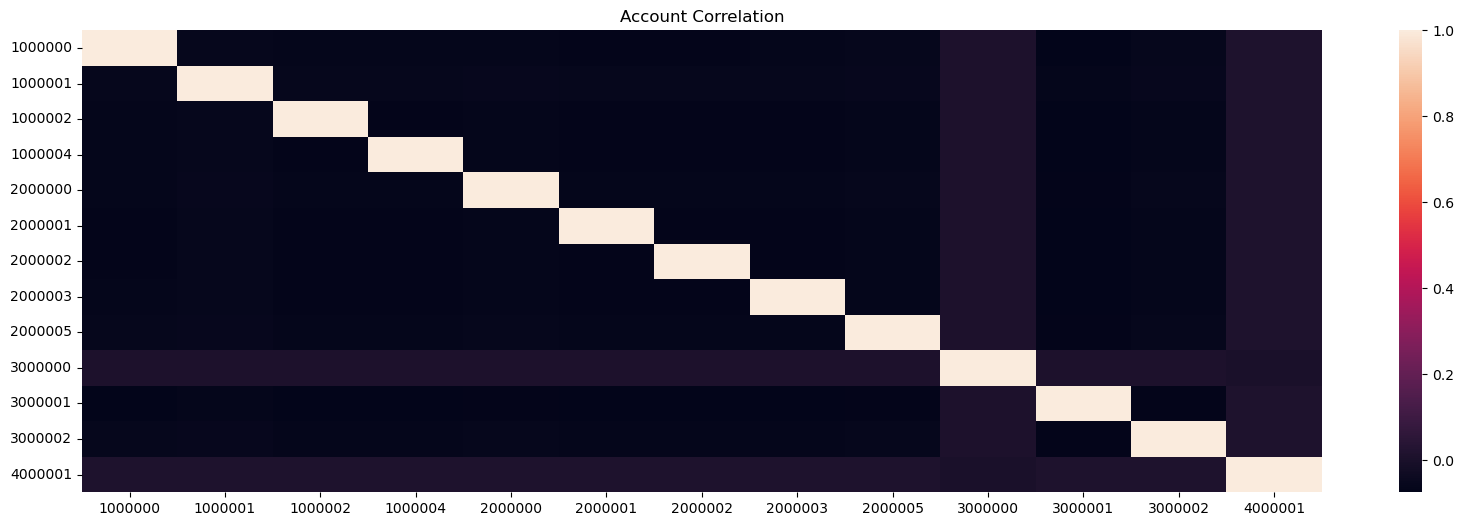

In [41]:
plt.figure(figsize=(20,6))
sns.heatmap(corrdf.corr()).set_title('Account Correlation')
plt.show()

>ther may be a relationship between account 3000000 and maybe some relations with 40000000

In [42]:
df[df['Account']==3000000]
#cash at the bank

Year Month Cost Centre  Account Account Description Account Type  \
9     2019   Jan       CC100  3000000        Cash at Bank        Asset   
22    2019   Jan       CC101  3000000        Cash at Bank        Asset   
35    2019   Jan       CC102  3000000        Cash at Bank        Asset   
48    2019   Jan       CC200  3000000        Cash at Bank        Asset   
61    2019   Jan       CC201  3000000        Cash at Bank        Asset   
...    ...   ...         ...      ...                 ...          ...   
4156  2021   Dec       CC201  3000000        Cash at Bank        Asset   
4169  2021   Dec       CC202  3000000        Cash at Bank        Asset   
4182  2021   Dec       CC300  3000000        Cash at Bank        Asset   
4195  2021   Dec       CC301  3000000        Cash at Bank        Asset   
4208  2021   Dec       CC302  3000000        Cash at Bank        Asset   

       Amount  Period  Day       Date  
9     476.713       1    1 2019-01-01  
22    464.197       1    1 2019-01-01  
35   -296.261       1    1 2019-01-01  
48    750.000       1    1 2019-01-01  
61    187.647       1    1 2019-01-01  
...       ...     ...  ...        ...  
4156  413.616      12    1 2021-12-01  
4169  375.657      12    1 2021-12-01  
4182 -492.546      12    1 2021-12-01  
4195 -579.986      12    1 2021-12-01  
4208 -282.056      12    1 2021-12-01  

[324 rows x 10 columns]

In [43]:
df[df['Account']==4000001]
#Accounts Payable

Year Month Cost Centre  Account Account Description Account Type  \
12    2019   Jan       CC100  4000001    Accounts Payable    Liability   
25    2019   Jan       CC101  4000001    Accounts Payable    Liability   
38    2019   Jan       CC102  4000001    Accounts Payable    Liability   
51    2019   Jan       CC200  4000001    Accounts Payable    Liability   
64    2019   Jan       CC201  4000001    Accounts Payable    Liability   
...    ...   ...         ...      ...                 ...          ...   
4159  2021   Dec       CC201  4000001    Accounts Payable    Liability   
4172  2021   Dec       CC202  4000001    Accounts Payable    Liability   
4185  2021   Dec       CC300  4000001    Accounts Payable    Liability   
4198  2021   Dec       CC301  4000001    Accounts Payable    Liability   
4211  2021   Dec       CC302  4000001    Accounts Payable    Liability   

      Amount  Period  Day       Date  
12     980.0       1    1 2019-01-01  
25     200.0       1    1 2019-01-01  
38    -980.0       1    1 2019-01-01  
51     980.0       1    1 2019-01-01  
64     784.0       1    1 2019-01-01  
...      ...     ...  ...        ...  
4159   804.0      12    1 2021-12-01  
4172 -1018.0      12    1 2021-12-01  
4185 -1020.0      12    1 2021-12-01  
4198  -612.0      12    1 2021-12-01  
4211 -1020.0      12    1 2021-12-01  

[324 rows x 10 columns]

thus changes in cash flow may need to be drawn for overdraft or something, causing maybe some relationship

# 3. Data Preparation

In [44]:
import numpy as np

In [45]:
#loop through each account
for account in df['Account'].unique():
    print(account)

1000000
1000001
1000002
1000004
2000000
2000001
2000002
2000003
2000005
3000000
3000001
3000002
4000001


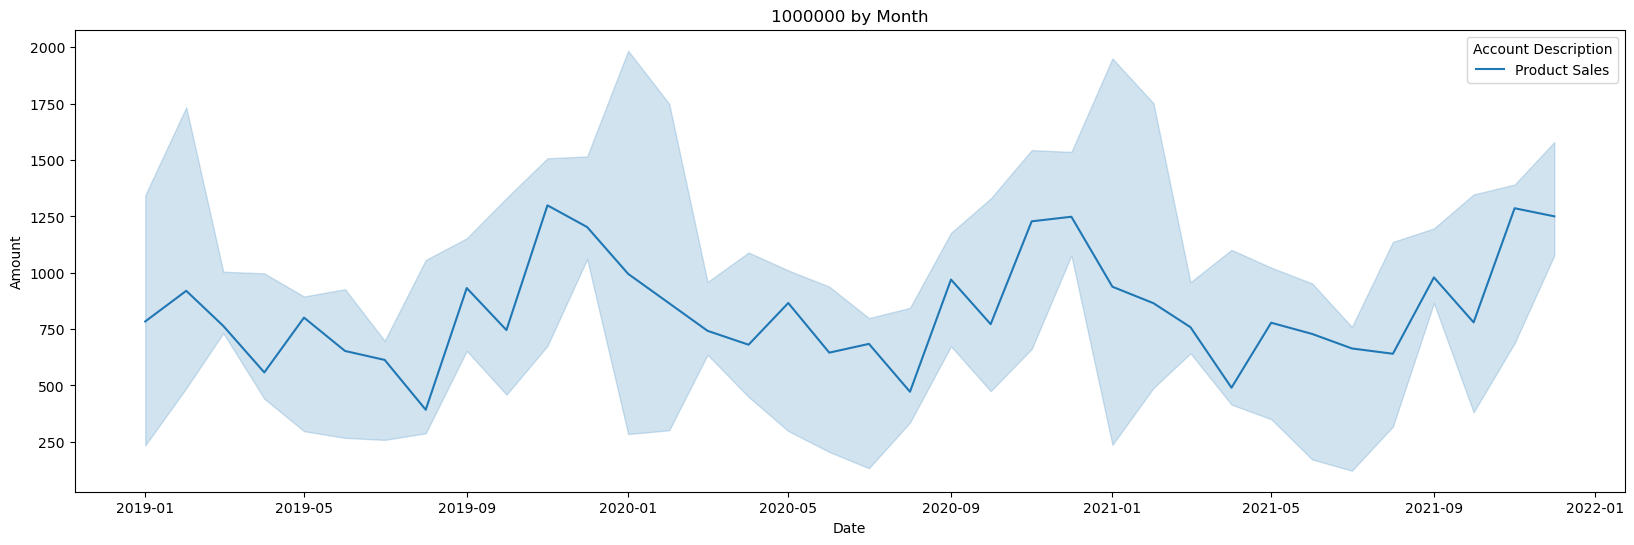

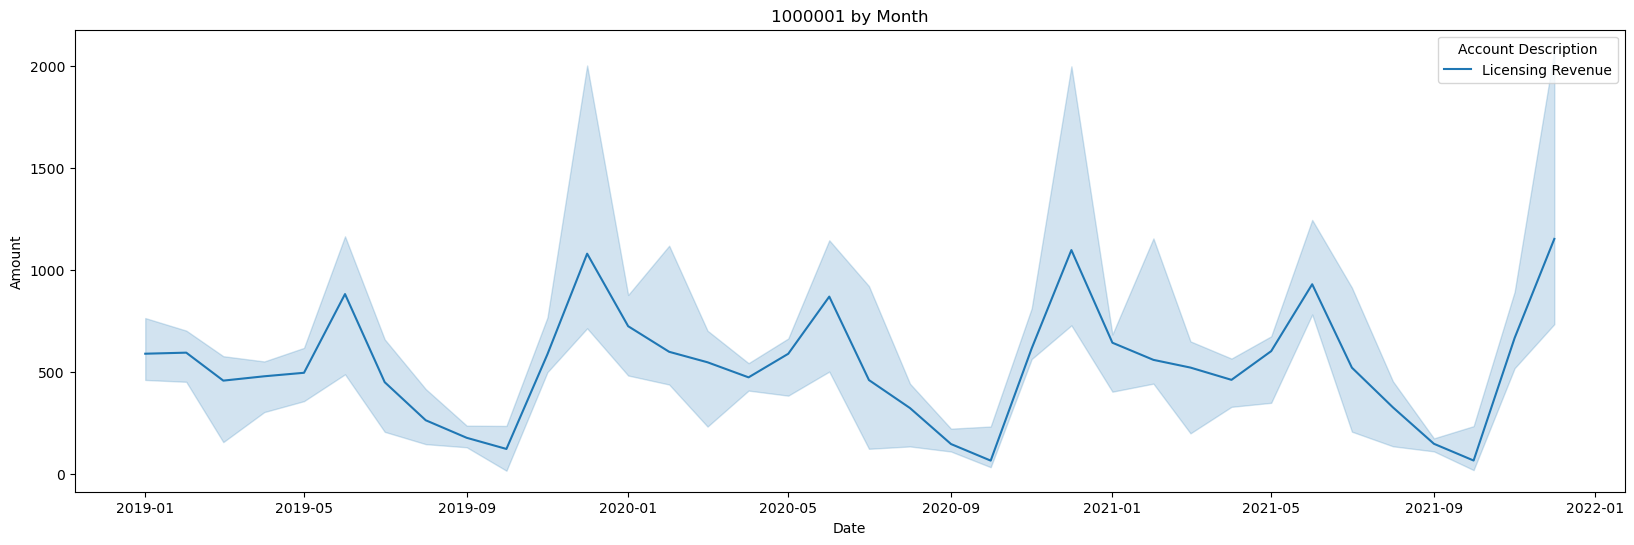

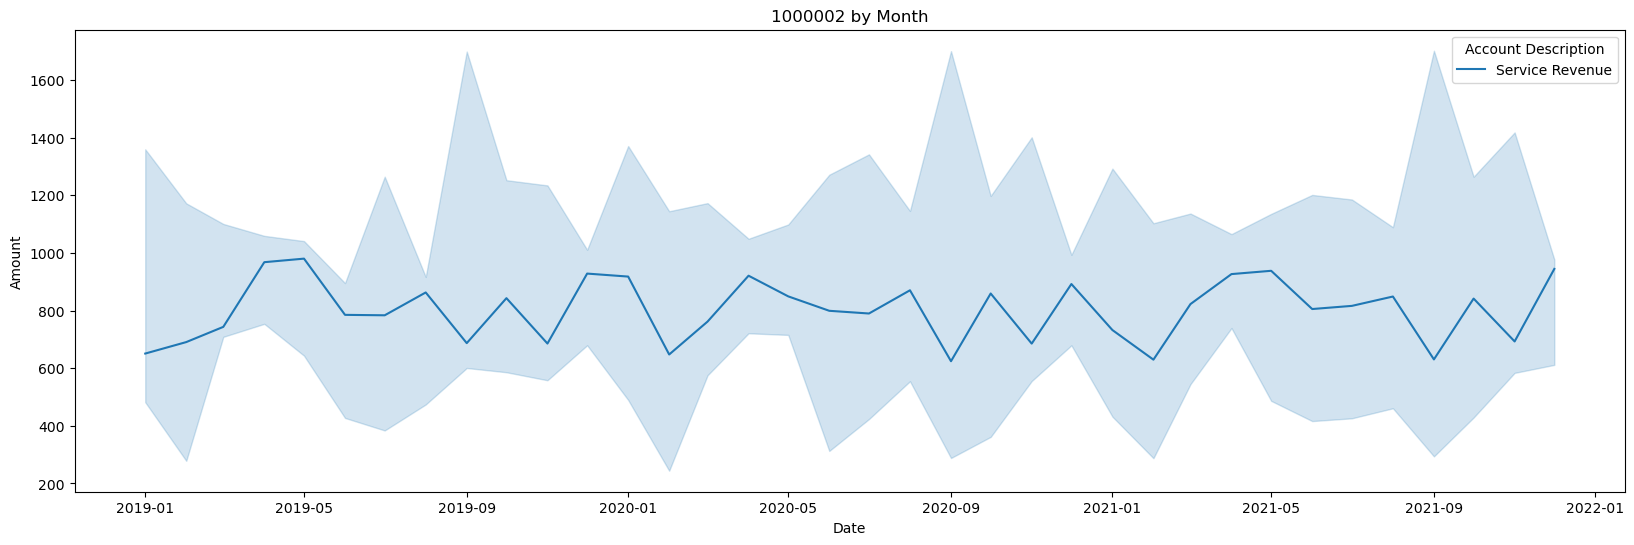

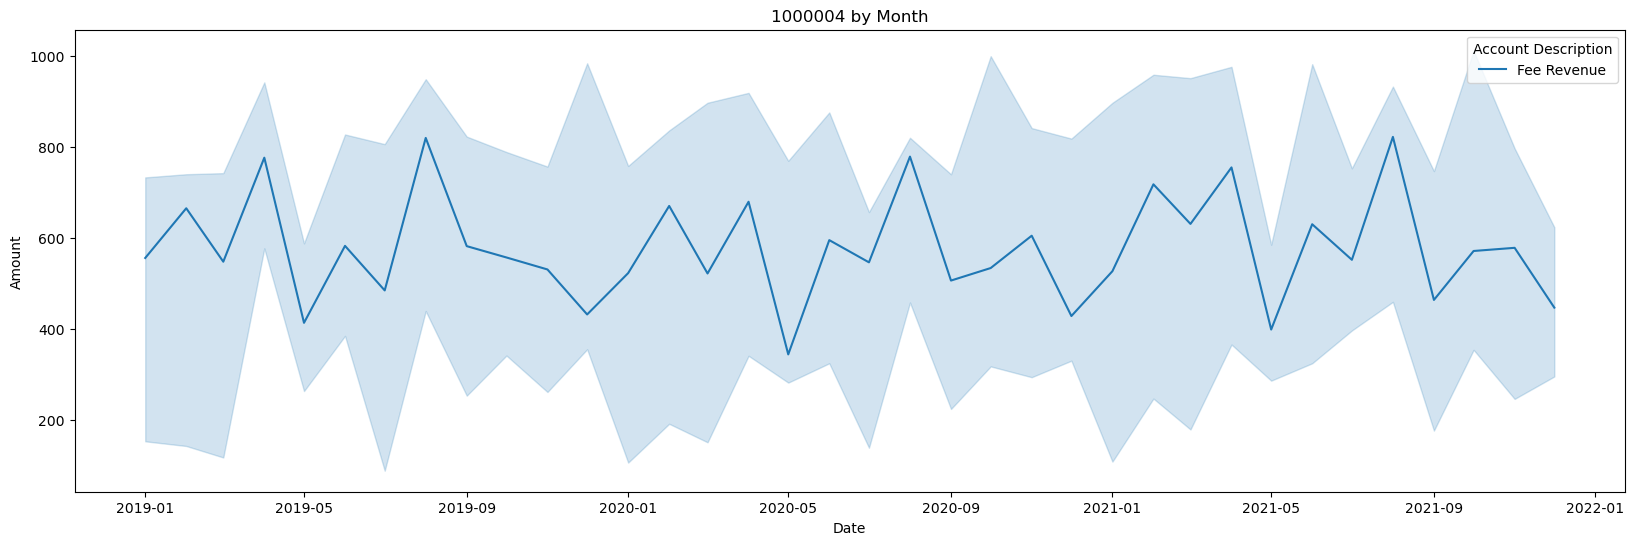

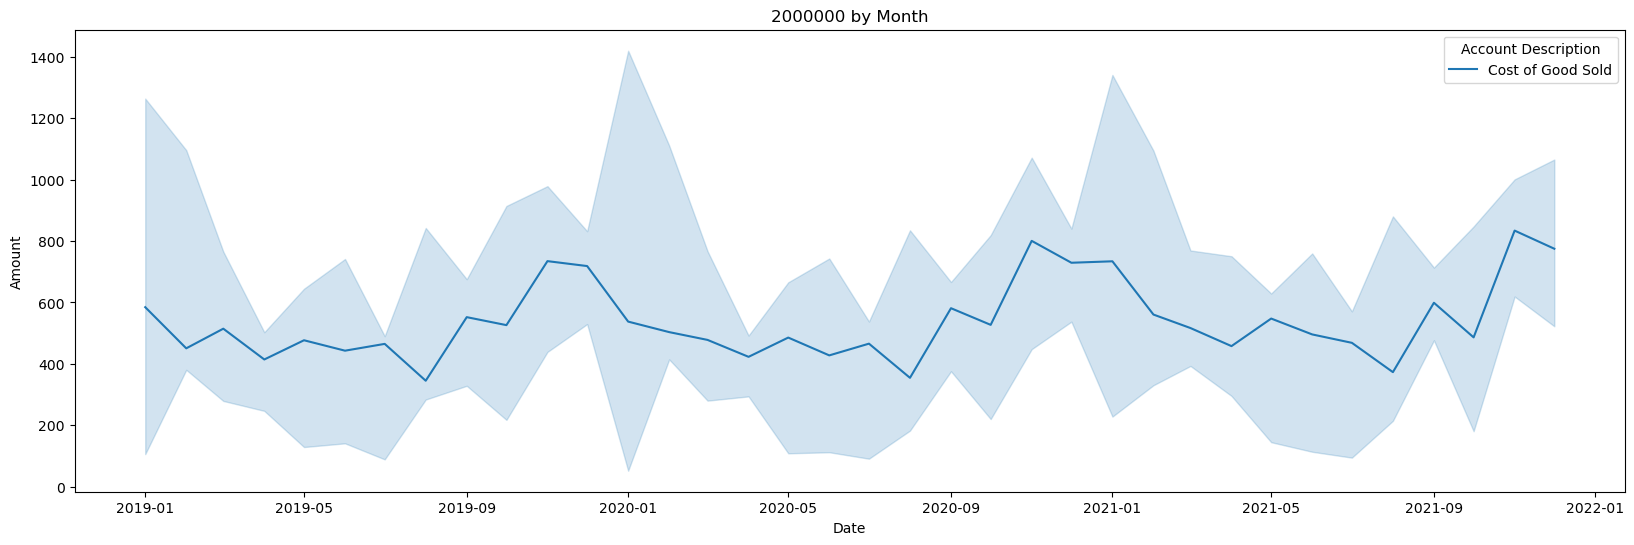

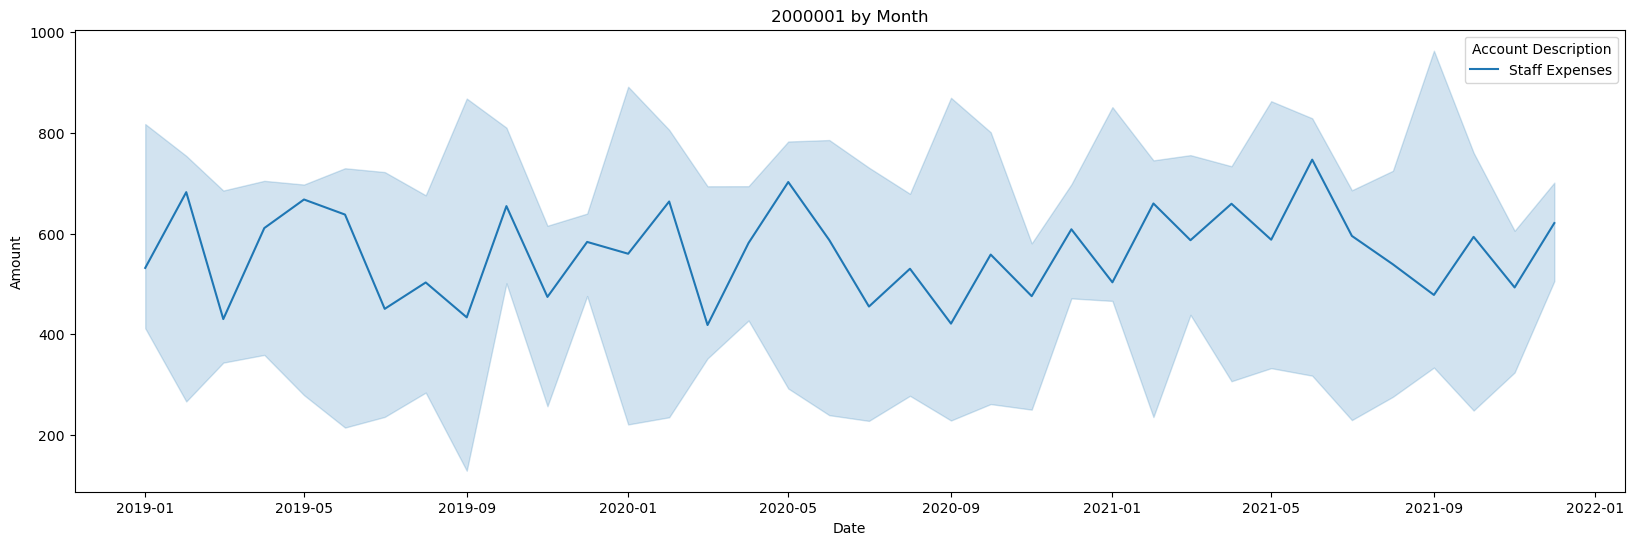

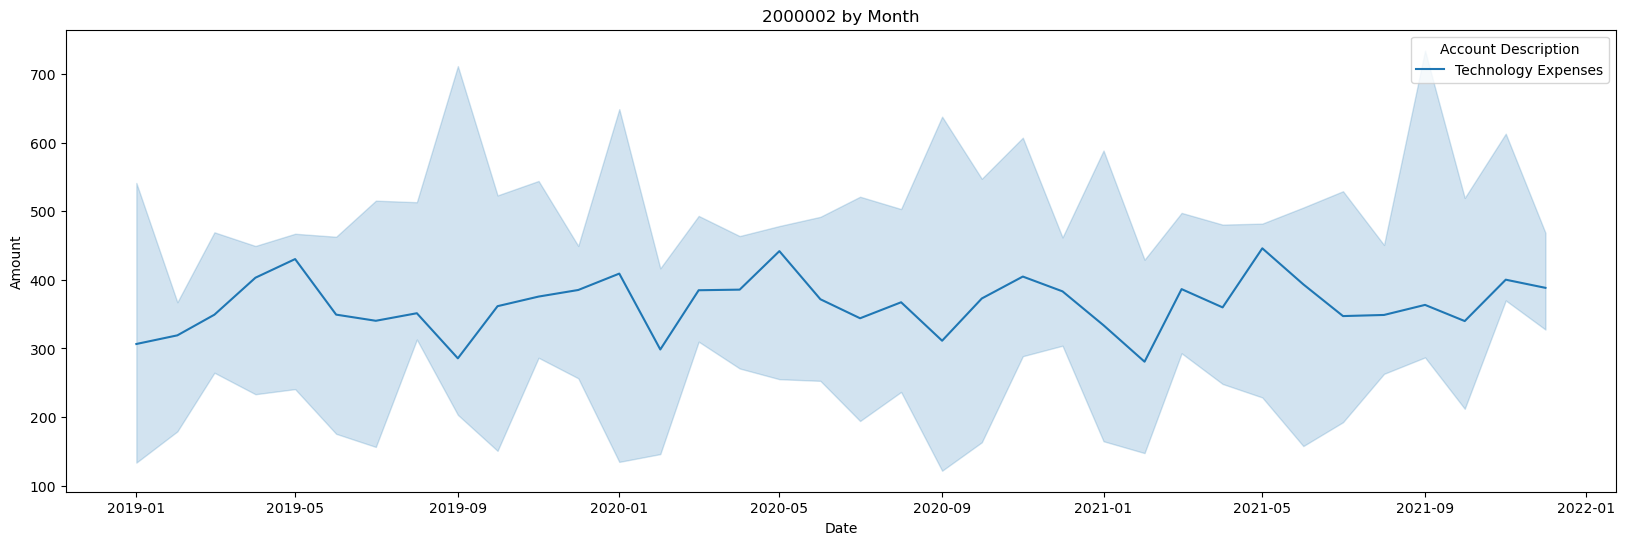

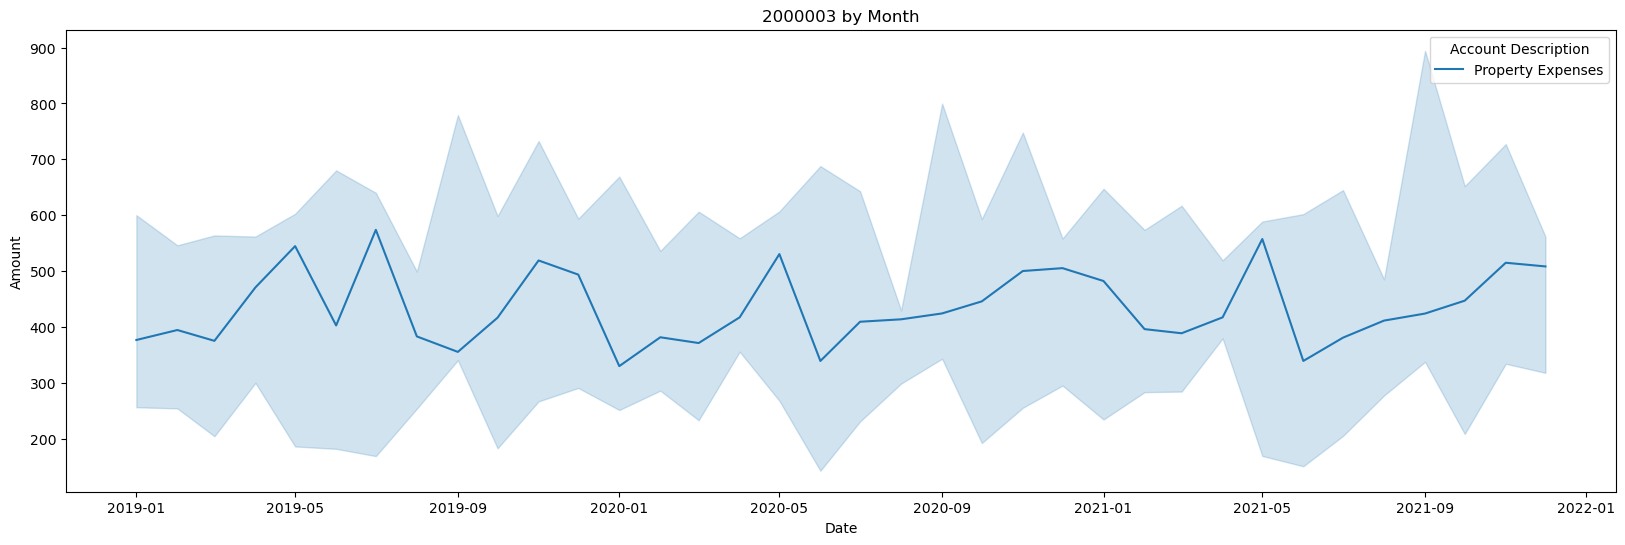

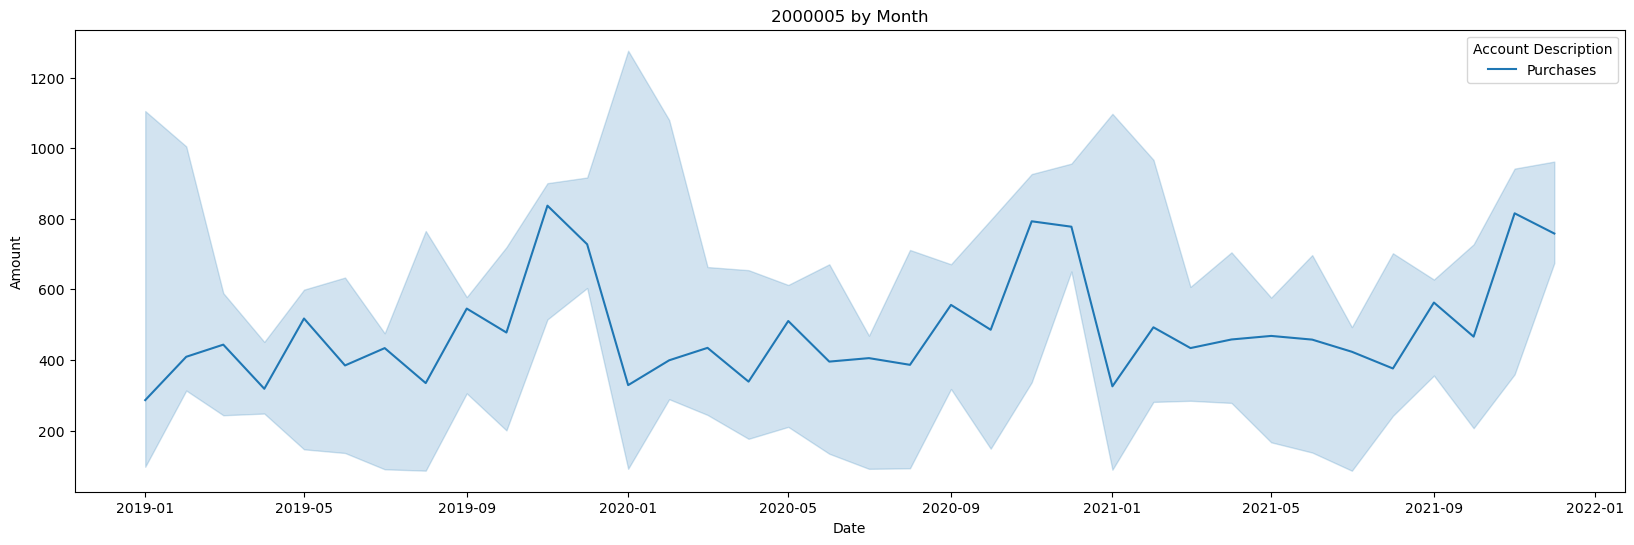

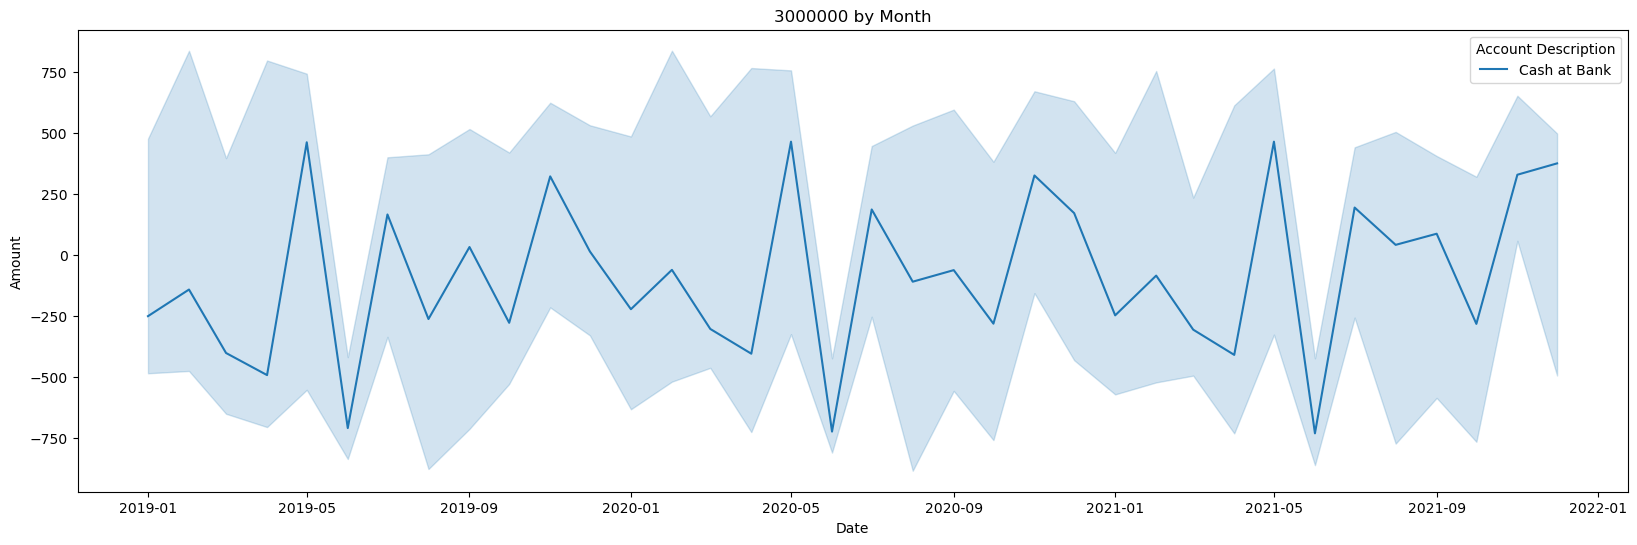

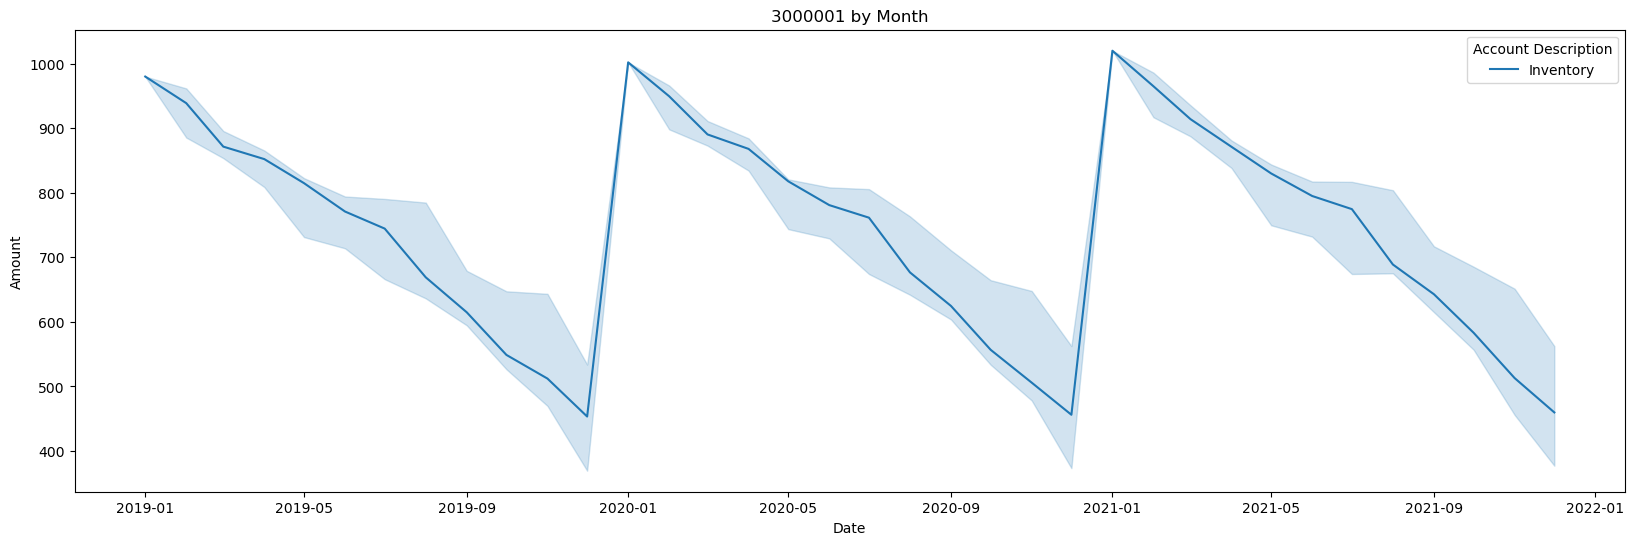

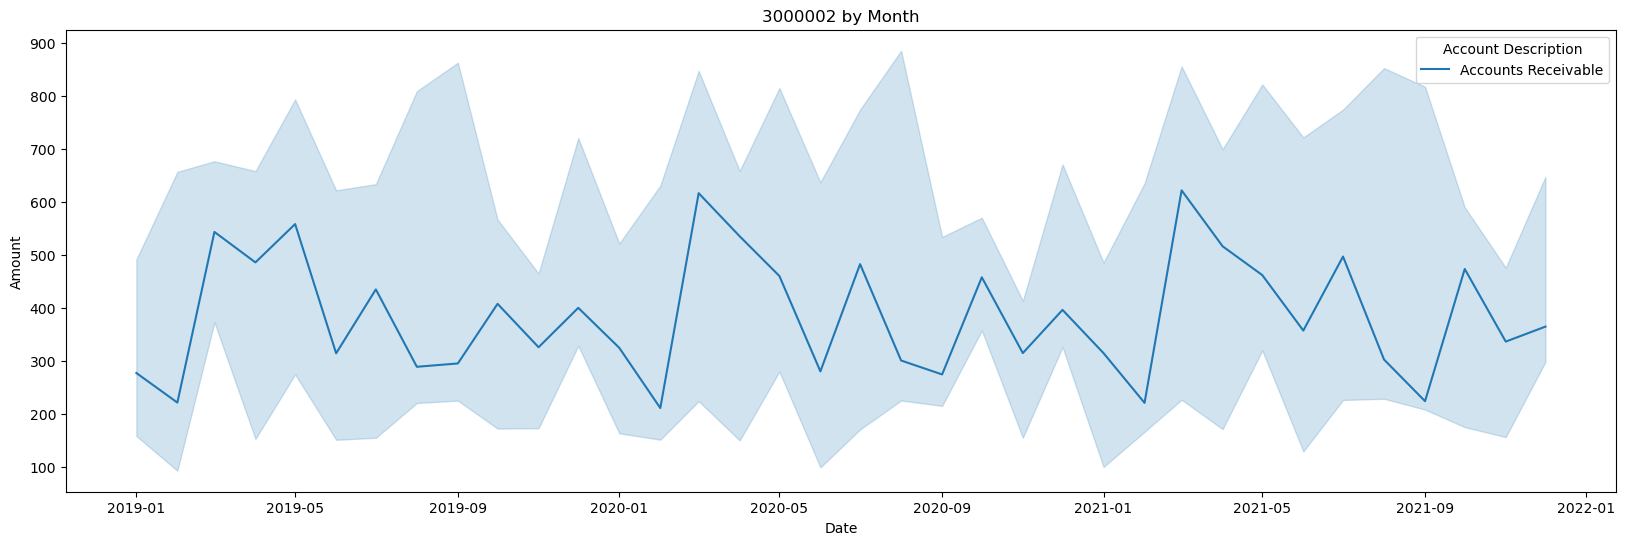

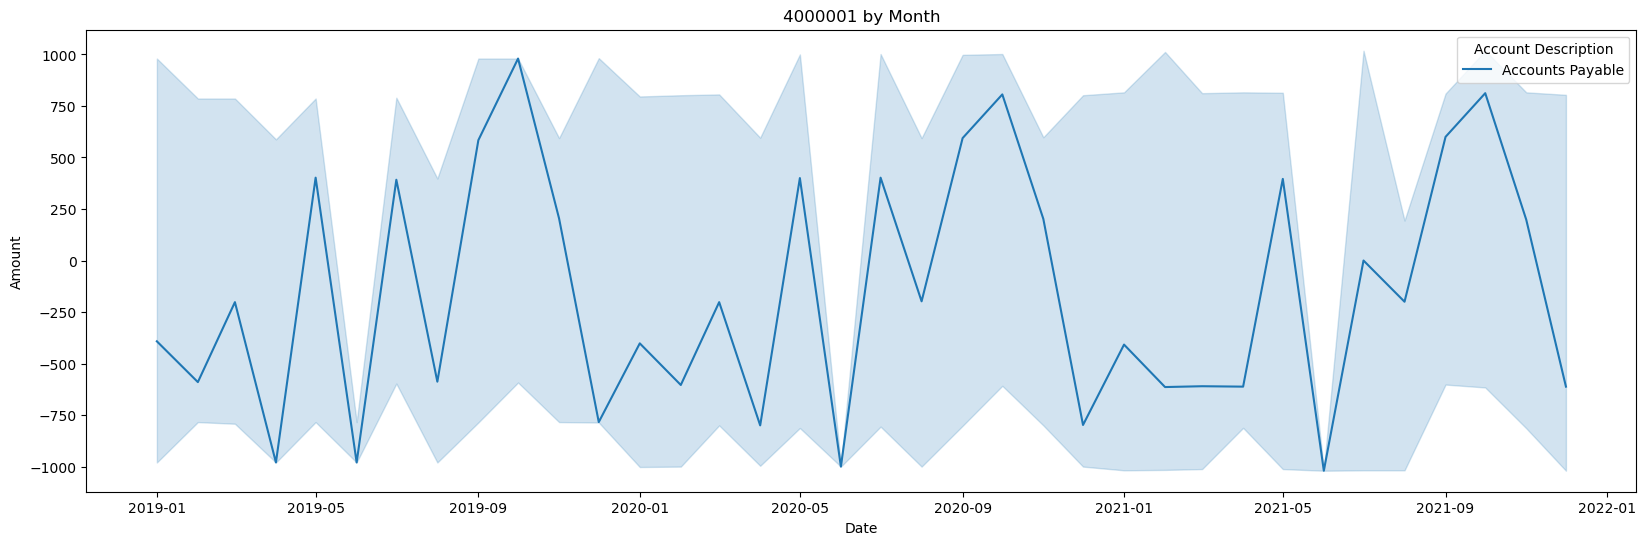

In [46]:
#visualize these accounts using seaborn
for account in df['Account'].unique():
    plt.figure(figsize=(20,6))
    sns.lineplot(x='Date', y='Amount', estimator=np.median, hue='Account Description', data=df[df['Account']==account]).set_title('{} by Month'.format(account))
    plt.show()

Based on all these graphs, for the machine learning model it will be best to strip out the inventory account as it does not follow the same pattern as the rest...

In [47]:
#filter out inventory from data frame(df)
df = df[df['Account']!=3000001]

In [48]:
#check to ensure new df does not have that inventory account number
df['Account'].unique()

array([1000000, 1000001, 1000002, 1000004, 2000000, 2000001, 2000002,
       2000003, 2000005, 3000000, 3000002, 4000001], dtype=int64)

## Convert Fields to Correct Data Type

### Convert Account

In [49]:
df.dtypes

Year                            int64
Month                          object
Cost Centre                    object
Account                         int64
Account Description            object
Account Type                   object
Amount                        float64
Period                          int64
Day                             int64
Date                   datetime64[ns]
dtype: object

In [50]:
df['Account'] = 'ACC' + df['Account'].astype(str)

In [51]:
df.head()

Year Month Cost Centre     Account Account Description Account Type  \
0  2019   Jan       CC100  ACC1000000       Product Sales      Revenue   
1  2019   Jan       CC100  ACC1000001   Licensing Revenue      Revenue   
2  2019   Jan       CC100  ACC1000002     Service Revenue      Revenue   
3  2019   Jan       CC100  ACC1000004         Fee Revenue      Revenue   
4  2019   Jan       CC100  ACC2000000   Cost of Good Sold      Expense   

     Amount  Period  Day       Date  
0  1344.051       1    1 2019-01-01  
1   480.968       1    1 2019-01-01  
2   650.820       1    1 2019-01-01  
3   339.360       1    1 2019-01-01  
4  1125.328       1    1 2019-01-01

In [52]:
#account was an int and now it's an object
df.dtypes

Year                            int64
Month                          object
Cost Centre                    object
Account                        object
Account Description            object
Account Type                   object
Amount                        float64
Period                          int64
Day                             int64
Date                   datetime64[ns]
dtype: object

### Convert Year

In [53]:
#we want our features representing catagorical values rather then numeric feature (a year is a catagory)
df['Year'] = df['Year'].astype(str)

In [54]:
df.dtypes

Year                           object
Month                          object
Cost Centre                    object
Account                        object
Account Description            object
Account Type                   object
Amount                        float64
Period                          int64
Day                             int64
Date                   datetime64[ns]
dtype: object

In [55]:
# we orginally above created this 'period' and 'day' and 'date' field to create this 'year' field
# we can now remove these fields because they are no longer needed

### Drop Analysis Fields

In [56]:
df.drop(['Period', 'Day', 'Date'], axis=1, inplace=True)

In [57]:
df.dtypes

Year                    object
Month                   object
Cost Centre             object
Account                 object
Account Description     object
Account Type            object
Amount                 float64
dtype: object

### Drop other fields

In [58]:
#now to check if 'account' and 'account descriptions' have the same number of records

#check account col.
len(df['Account'].unique())

12

In [59]:
#check account description col.
len(df['Account Description'].unique())

12

In [60]:
#combine them and then check again
df['AccountVal'] = df['Account'] + df['Account Description']

In [61]:
len(df['AccountVal'].unique())

12

In [62]:
df.drop(['AccountVal', 'Account Description'], axis=1, inplace=True)

In [63]:
df.head()

Year Month Cost Centre     Account Account Type    Amount
0  2019   Jan       CC100  ACC1000000      Revenue  1344.051
1  2019   Jan       CC100  ACC1000001      Revenue   480.968
2  2019   Jan       CC100  ACC1000002      Revenue   650.820
3  2019   Jan       CC100  ACC1000004      Revenue   339.360
4  2019   Jan       CC100  ACC2000000      Expense  1125.328

## Do One-Hot-Encoding for the data frame

In [64]:
df = pd.get_dummies(df)

In [65]:
df.head()

Amount  Year_2019  Year_2020  Year_2021  Month_Apr  Month_Aug  Month_Dec  \
0  1344.051          1          0          0          0          0          0   
1   480.968          1          0          0          0          0          0   
2   650.820          1          0          0          0          0          0   
3   339.360          1          0          0          0          0          0   
4  1125.328          1          0          0          0          0          0   

   Month_Feb  Month_Jan  Month_Jul  ...  Account_ACC2000002  \
0          0          1          0  ...                   0   
1          0          1          0  ...                   0   
2          0          1          0  ...                   0   
3          0          1          0  ...                   0   
4          0          1          0  ...                   0   

   Account_ACC2000003  Account_ACC2000005  Account_ACC3000000  \
0                   0                   0                   0   
1                   0                   0                   0   
2                   0                   0                   0   
3                   0                   0                   0   
4                   0                   0                   0   

   Account_ACC3000002  Account_ACC4000001  Account Type_Asset  \
0                   0                   0                   0   
1                   0                   0                   0   
2                   0                   0                   0   
3                   0                   0                   0   
4                   0                   0                   0   

   Account Type_Expense  Account Type_Liability  Account Type_Revenue  
0                     0                       0                     1  
1                     0                       0                     1  
2                     0                       0                     1  
3                     0                       0                     1  
4                     1                       0                     0  

[5 rows x 41 columns]

In [66]:
df.dtypes

Amount                    float64
Year_2019                   uint8
Year_2020                   uint8
Year_2021                   uint8
Month_Apr                   uint8
Month_Aug                   uint8
Month_Dec                   uint8
Month_Feb                   uint8
Month_Jan                   uint8
Month_Jul                   uint8
Month_Jun                   uint8
Month_Mar                   uint8
Month_May                   uint8
Month_Nov                   uint8
Month_Oct                   uint8
Month_Sep                   uint8
Cost Centre_CC100           uint8
Cost Centre_CC101           uint8
Cost Centre_CC102           uint8
Cost Centre_CC200           uint8
Cost Centre_CC201           uint8
Cost Centre_CC202           uint8
Cost Centre_CC300           uint8
Cost Centre_CC301           uint8
Cost Centre_CC302           uint8
Account_ACC1000000          uint8
Account_ACC1000001          uint8
Account_ACC1000002          uint8
Account_ACC1000004          uint8
Account_ACC200

# 4. Modelling

In [67]:
df.head()

Amount  Year_2019  Year_2020  Year_2021  Month_Apr  Month_Aug  Month_Dec  \
0  1344.051          1          0          0          0          0          0   
1   480.968          1          0          0          0          0          0   
2   650.820          1          0          0          0          0          0   
3   339.360          1          0          0          0          0          0   
4  1125.328          1          0          0          0          0          0   

   Month_Feb  Month_Jan  Month_Jul  ...  Account_ACC2000002  \
0          0          1          0  ...                   0   
1          0          1          0  ...                   0   
2          0          1          0  ...                   0   
3          0          1          0  ...                   0   
4          0          1          0  ...                   0   

   Account_ACC2000003  Account_ACC2000005  Account_ACC3000000  \
0                   0                   0                   0   
1                   0                   0                   0   
2                   0                   0                   0   
3                   0                   0                   0   
4                   0                   0                   0   

   Account_ACC3000002  Account_ACC4000001  Account Type_Asset  \
0                   0                   0                   0   
1                   0                   0                   0   
2                   0                   0                   0   
3                   0                   0                   0   
4                   0                   0                   0   

   Account Type_Expense  Account Type_Liability  Account Type_Revenue  
0                     0                       0                     1  
1                     0                       0                     1  
2                     0                       0                     1  
3                     0                       0                     1  
4                     1                       0                     0  

[5 rows x 41 columns]

In [68]:
X = df.drop('Amount', axis=1)
y = df['Amount']

In [69]:
X.columns

Index(['Year_2019', 'Year_2020', 'Year_2021', 'Month_Apr', 'Month_Aug',
       'Month_Dec', 'Month_Feb', 'Month_Jan', 'Month_Jul', 'Month_Jun',
       'Month_Mar', 'Month_May', 'Month_Nov', 'Month_Oct', 'Month_Sep',
       'Cost Centre_CC100', 'Cost Centre_CC101', 'Cost Centre_CC102',
       'Cost Centre_CC200', 'Cost Centre_CC201', 'Cost Centre_CC202',
       'Cost Centre_CC300', 'Cost Centre_CC301', 'Cost Centre_CC302',
       'Account_ACC1000000', 'Account_ACC1000001', 'Account_ACC1000002',
       'Account_ACC1000004', 'Account_ACC2000000', 'Account_ACC2000001',
       'Account_ACC2000002', 'Account_ACC2000003', 'Account_ACC2000005',
       'Account_ACC3000000', 'Account_ACC3000002', 'Account_ACC4000001',
       'Account Type_Asset', 'Account Type_Expense', 'Account Type_Liability',
       'Account Type_Revenue'],
      dtype='object')

In [70]:
y

0       1344.051
1        480.968
2        650.820
3        339.360
4       1125.328
          ...   
4206     540.060
4207     698.121
4208    -282.056
4210    1152.680
4211   -1020.000
Name: Amount, Length: 3888, dtype: float64

In [71]:
from sklearn.model_selection import train_test_split

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1234)

In [73]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(2721, 40) (1167, 40) (2721,) (1167,)


In [74]:
## Import Dependencies

In [75]:
from sklearn.pipeline import make_pipeline #lets you build ml pipelines (standard_scaler if none catagorcal/not one hot...)

In [76]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet #going to create 5 total piplines, one for ridge, one for lasso...

In [77]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

### Create the five piplines

In [78]:
pipelines = {
    'rf':make_pipeline(RandomForestRegressor(random_state=1234)),
    'gb':make_pipeline(GradientBoostingRegressor(random_state=1234)),
    'ridge':make_pipeline(Ridge(random_state=1234)),
    'lasso':make_pipeline(Lasso(random_state=1234)),
    'enet':make_pipeline(ElasticNet(random_state=1234)),
}

### Setup a hyper param grid

In [79]:
#this allows fine tuning with paremeter
RandomForestRegressor().get_params()
#then use these to tune, however there is a library that will help tuning these params ()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [80]:
hypergrid = {
    'rf': {
        'randomforestregressor__min_samples_split':[2,4,6],
        'randomforestregressor__min_samples_leaf':[1,2,3]
    },
    'gb':{
        'gradientboostingregressor__alpha':[0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 0.99]
    },
    'ridge':{
        'ridge__alpha':[0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 0.99]
    },
    'lasso':{
        'lasso__alpha':[0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 0.99]
    },
    'enet':{
        'elasticnet__alpha':[0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 0.99]
    }
}

In [81]:
from sklearn.model_selection import GridSearchCV
from sklearn.exceptions import NotFittedError

In [82]:
fit_models = {}
for algo, pipeline in pipelines.items():
    model = GridSearchCV(pipeline, hypergrid[algo], cv=10, n_jobs=-1)
    try:
        model.fit(X_train, y_train)
        fit_models[algo] = model
        print('{} has been successfully fit.'.format(algo))
    except NotFittedError as e:
        print(repr(e))

rf has been successfully fit.
gb has been successfully fit.
ridge has been successfully fit.
lasso has been successfully fit.
enet has been successfully fit.


## we can now make a predition

In [83]:
fit_models['rf'].predict(X_test)

array([ 274.21292,  503.37868,  250.26521, ..., 1032.00728, -288.41532,
       -992.34   ])

In [84]:
fit_models['ridge'].predict(X_test)

array([ 416.0213625 ,  477.94046711,  341.09806475, ...,  493.32938612,
       -229.8203679 , -485.71441706])

## to get the best model

In [85]:
#go to evalution stage

# 5. Evaluation

In [86]:
from sklearn.metrics import r2_score, mean_absolute_error

In [87]:
for algo,model in fit_models.items():
    yhat = model.predict(X_test)
    print('{} scores - R2:{} MAE:{}'.format(algo, r2_score(y_test, yhat), mean_absolute_error(y_test, yhat)))
    

rf scores - R2:0.8197891414943025 MAE:142.11921976006852
gb scores - R2:0.48985168340175467 MAE:263.10354134137725
ridge scores - R2:0.3613032296152817 MAE:296.5759816944058
lasso scores - R2:0.3597764955615558 MAE:296.804892767996
enet scores - R2:0.3610886530527241 MAE:296.9010224274051


In [88]:
best_model = fit_models['rf']

# Deployment